<p style="text-align: center;">
    <img src="logo-uvbf.png" alt="Photo" width="300">
</p>

## Membres du groupe 3 :
##### BAZIÉ Donaldson Dureel
##### BICABA H. Pauline
##### COULIBALY Cheick Ahmed
##### TRAORÉ Soungalo

## 0. Exploration initiale

In [1]:
# Importation des données
import pandas as pd
df = pd.read_csv("dataset_anon.csv")

# Exploration initiale
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Y1               163 non-null    float64
 1   Y2               163 non-null    float64
 2   experiment_date  163 non-null    object 
 3   feat_A           153 non-null    float64
 4   feat_B           71 non-null     float64
 5   feat_C           36 non-null     float64
 6   feat_D           135 non-null    float64
 7   feat_E           163 non-null    float64
 8   feat_F           163 non-null    float64
 9   feat_G           162 non-null    object 
 10  feat_H           52 non-null     object 
 11  feat_I           39 non-null     object 
 12  feat_J           157 non-null    object 
 13  feat_K           153 non-null    object 
 14  feat_L           153 non-null    object 
 15  feat_M           148 non-null    object 
 16  feat_N           88 non-null     object 
 17  feat_O          

Y1                   0
Y2                   0
experiment_date      0
feat_A              10
feat_B              92
feat_C             127
feat_D              28
feat_E               0
feat_F               0
feat_G               1
feat_H             111
feat_I             124
feat_J               6
feat_K              10
feat_L              10
feat_M              15
feat_N              75
feat_O             124
feat_P             137
feat_Q              22
feat_R              74
feat_S               2
feat_T               8
feat_U              15
feat_V              72
dtype: int64

Le jeu de données étudié provient d’une entreprise spécialisée dans la conception de pièces critiques pour moteurs d’avion. Chaque ligne représente une expérimentation sur une configuration particulière, avec des mesures de performance (`Y1`, `Y2`) et des caractéristiques techniques (`feat_A` à `feat_V`). Une première exploration est réalisée afin d’avoir une vision d’ensemble des données disponibles, de leur qualité, et de leur structure.

## 1. Analyse exploratoire univariée et bivariée

Il s'agit d'explorer : 
- les distributions de chaque variable individuellement (analyse univariée)
- les relations entre paires de variables (analyse bivariée)

### 1.1. Étude de la distribution de chaque variable

Il s’agit d’analyser chaque variable individuellement, pour repérer :
- le type de variable (quantitative, qualitative)
- sa distribution (centrée, dispersée, asymétrique…)
- les valeurs fréquentes
- les valeurs extrêmes (outliers)

In [2]:
# Identifier les types de variables : séparer les variables numériques et catégorielles
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

print("Variables numériques :", list(num_cols))
print("Variables catégorielles :", list(cat_cols))

Variables numériques : ['Y1', 'Y2', 'feat_A', 'feat_B', 'feat_C', 'feat_D', 'feat_E', 'feat_F']
Variables catégorielles : ['experiment_date', 'feat_G', 'feat_H', 'feat_I', 'feat_J', 'feat_K', 'feat_L', 'feat_M', 'feat_N', 'feat_O', 'feat_P', 'feat_Q', 'feat_R', 'feat_S', 'feat_T', 'feat_U', 'feat_V']


Nous séparons les variables du dataset en deux types :
- **variables numériques** (e.g. Y1, Y2, feat_A à feat_F) : utilisées pour des analyses statistiques et de corrélation.
- **variables catégorielles** (feat_G à feat_V + experiment_date) : souvent qualitatives, à traiter par comptage ou analyse des modalités.

Ces deux types seront explorés séparément.

In [3]:
#Distribution des variables numériques
# Statistiques descriptives
print(df[num_cols].describe())

               Y1           Y2      feat_A      feat_B     feat_C      feat_D  \
count  163.000000   163.000000  153.000000   71.000000  36.000000  135.000000   
mean     4.280316   717.154008    1.257822  476.301304   2.864713  347.656648   
std      1.373060   211.010163    0.488035  155.263428   0.508129  151.274713   
min      1.234800   282.800000    0.318019  244.583133   1.550790   42.706553   
25%      3.224200   580.066667    1.261258  314.464028   3.022871  337.381768   
50%      4.298000   696.733333    1.291545  552.145344   3.092007  368.699907   
75%      5.230960   820.575000    1.291545  626.986920   3.092007  375.817665   
max     10.099600  1600.666667    3.220210  689.318953   3.475982  882.602093   

           feat_E      feat_F  
count  163.000000  163.000000  
mean     2.035402    4.979531  
std      0.754947    1.533980  
min      0.000000    0.000000  
25%      1.822915    4.889539  
50%      1.822915    4.889539  
75%      1.822915    4.889539  
max      5.468

Nous obtenons les éléments de :
- tendance centrale : moyenne et médiane (50%)
- dispersion : écart-type, min, max
- cela nous permet d’avoir une première idée de la variabilité des variables.

Par exemple :
- la variable **Y1** varie entre 1.23 et 10.10 avec une moyenne autour de 4.28, traduisant une hétérogénéité des performances mesurées.
- Ll variable **feat_B** a beaucoup de valeurs manquantes (seulement 71 sur 163), indiquant qu’elle ne concerne qu’une partie des conceptions.


Nous obtenons les éléments de tendance centrale : la moyenne, la médiane et de dispersion: l'écart-type, le minimun et la maximun

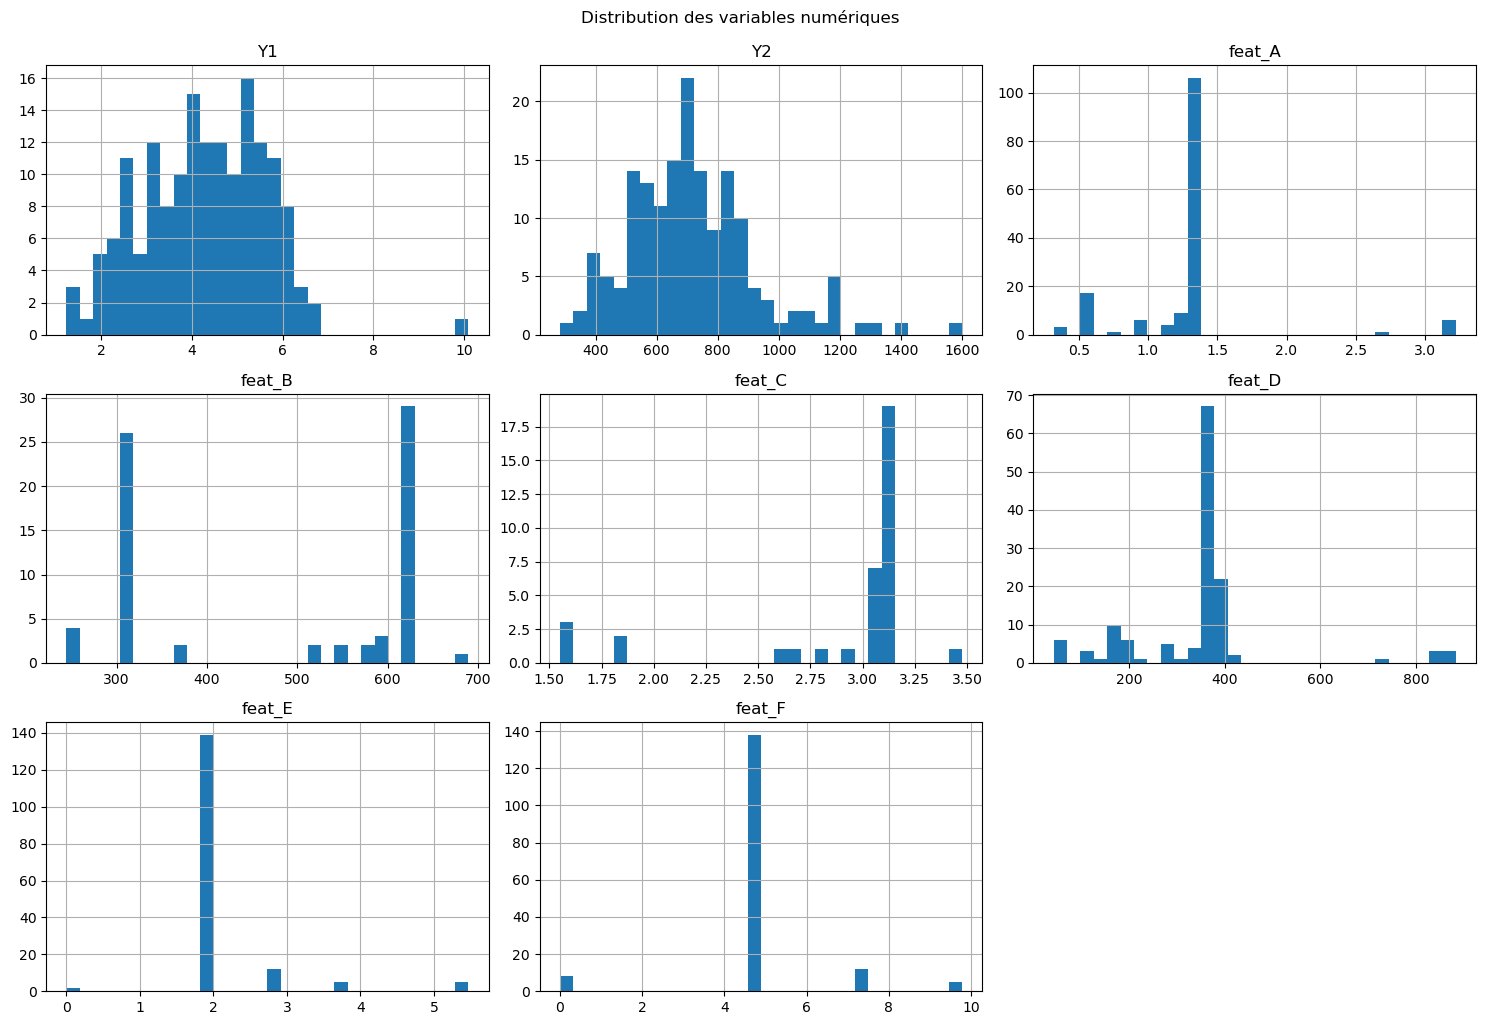

In [4]:
# Visualisation à l'aide des histogrammes

import matplotlib.pyplot as plt

df[num_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.suptitle("Distribution des variables numériques", y=1.02)
plt.show()

Les histogrammes permettent de visualiser la forme des distributions :
- **Y1** et **Y2** ont une distribution **approximativement normale**,
- certaines variables comme **feat_B** ou **feat_C** sont très asymétriques,
- cela nous aide à détecter des variables à transformer ou normaliser plus tard.

In [5]:
# Distribution des variables catégorielles
# Comptage des modalités

for col in cat_cols:
    print(f"\n{col} :")
    print(df[col].value_counts())


experiment_date :
experiment_date
2020-09-10    8
2021-01-24    8
2019-02-18    8
2021-11-20    7
2020-10-23    6
             ..
2019-04-06    1
2019-06-30    1
2019-06-08    1
2020-10-30    1
2020-08-08    1
Name: count, Length: 65, dtype: int64

feat_G :
feat_G
myers          88
size           20
les            19
boots          12
competition    11
tournament      8
bag             3
username        1
Name: count, dtype: int64

feat_H :
feat_H
switching    22
integrate    12
tablets      12
cow           4
hoping        1
film          1
Name: count, dtype: int64

feat_I :
feat_I
mfg         14
cisco       10
worth        9
finances     4
chess        1
pvc          1
Name: count, dtype: int64

feat_J :
feat_J
gr         131
issued      22
coleman      4
Name: count, dtype: int64

feat_K :
feat_K
eh       138
enemy     15
Name: count, dtype: int64

feat_L :
feat_L
numeric     90
thinkpad    63
Name: count, dtype: int64

feat_M :
feat_M
legends           35
belize            23
lit

[Info] experiment_date a trop de modalités (65) pour un graphique lisible. Affichage ignoré.


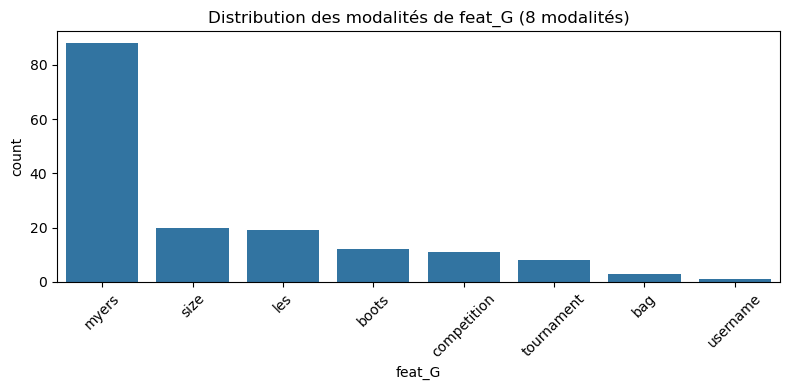

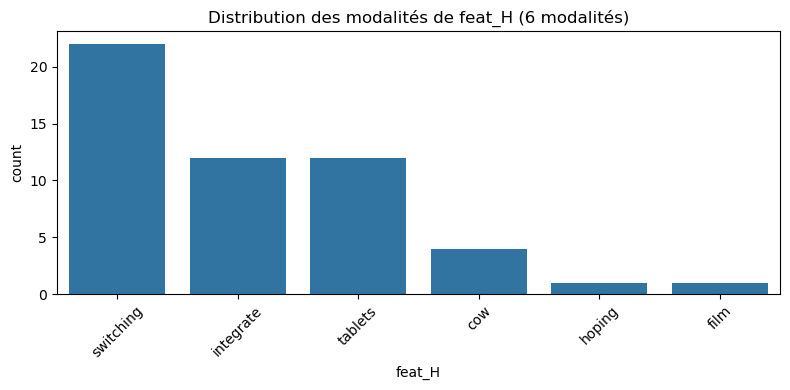

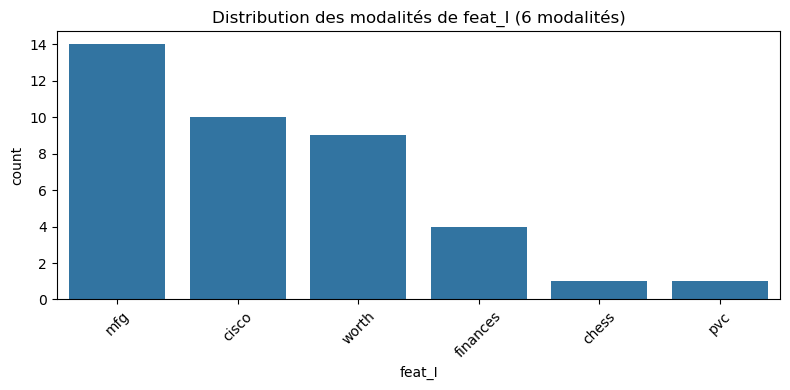

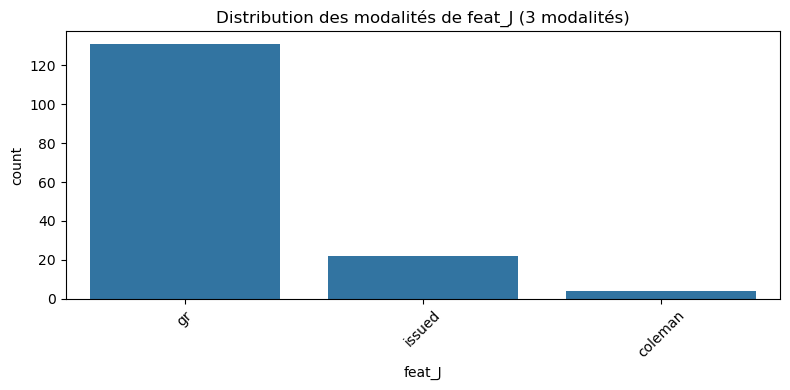

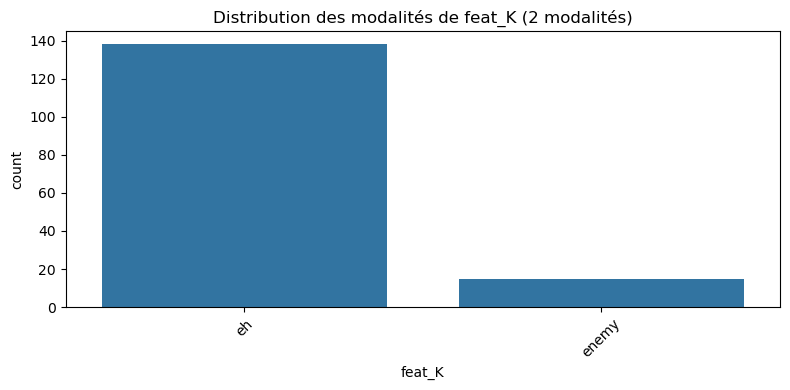

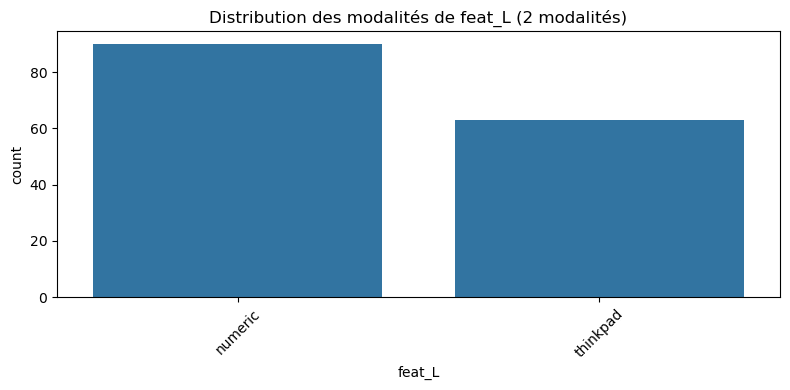

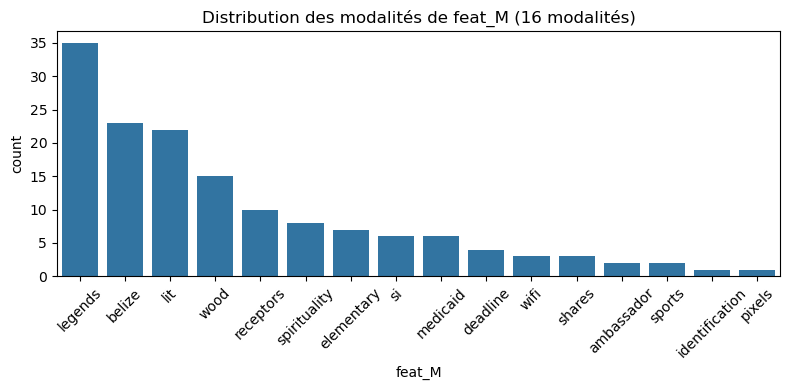

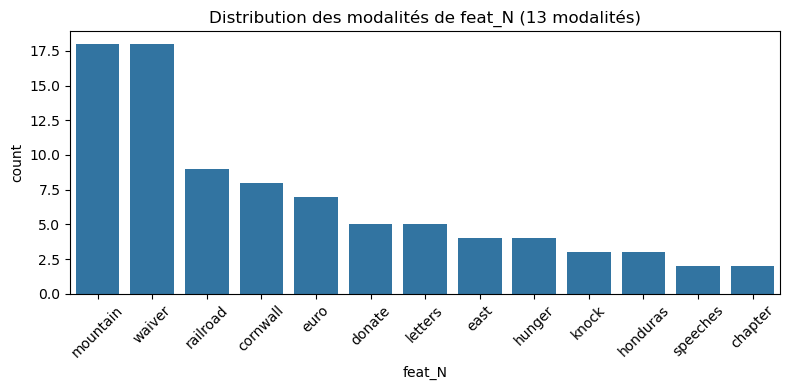

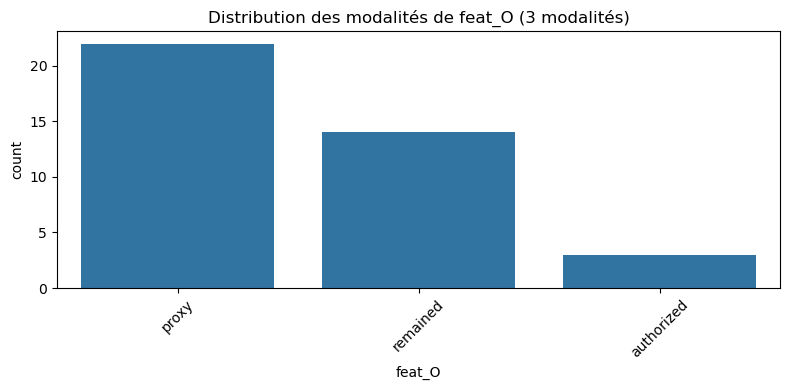

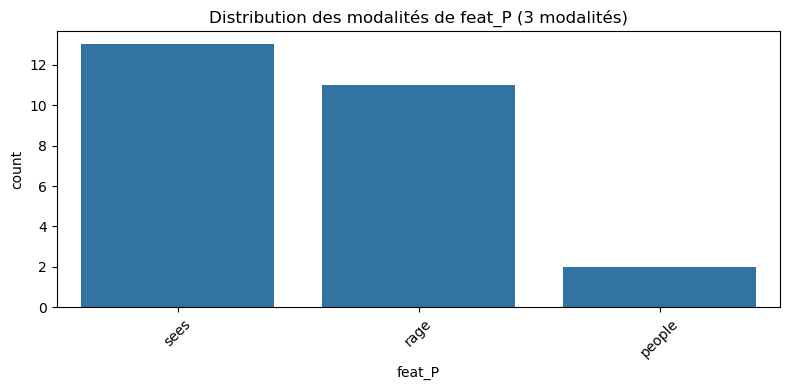

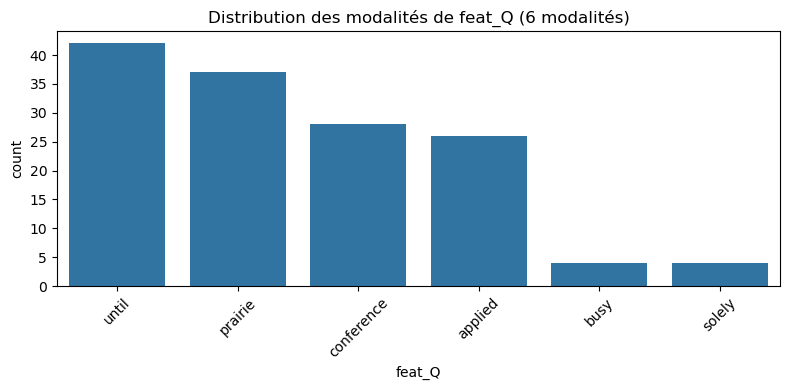

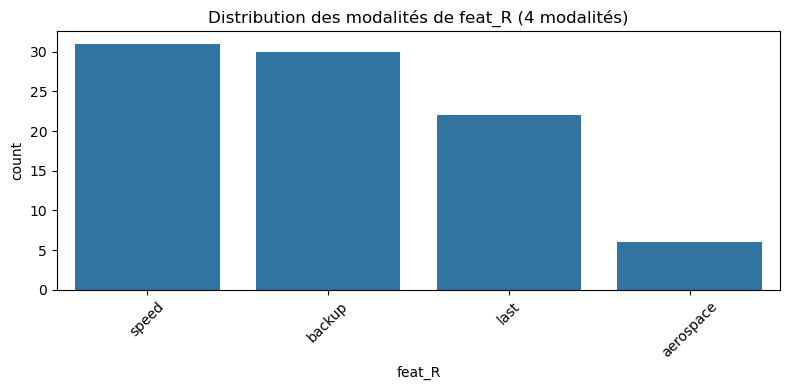

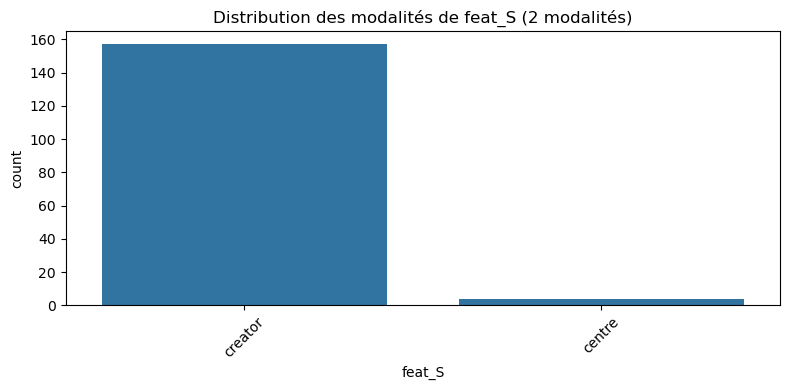

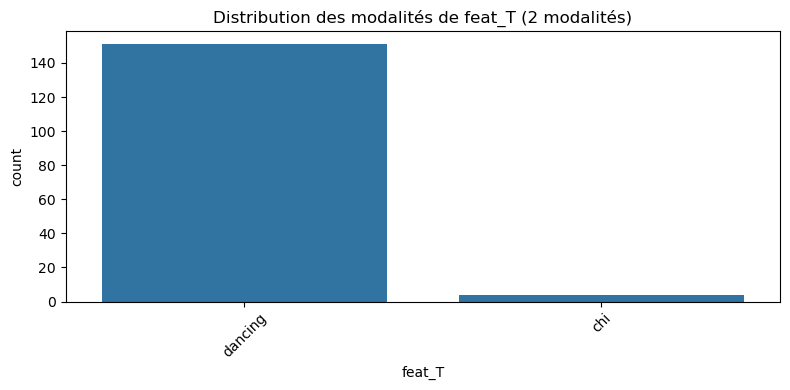

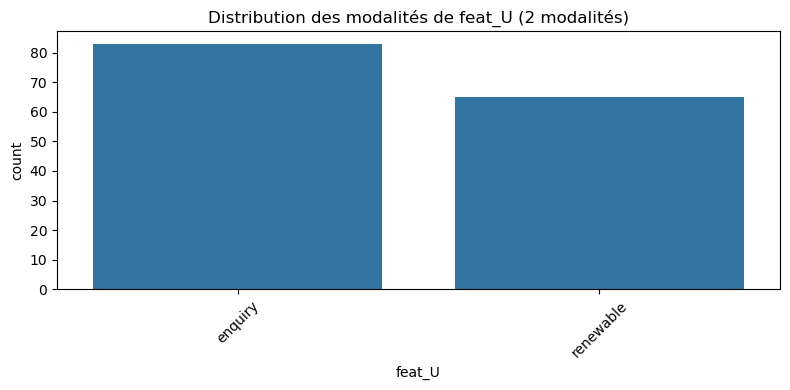

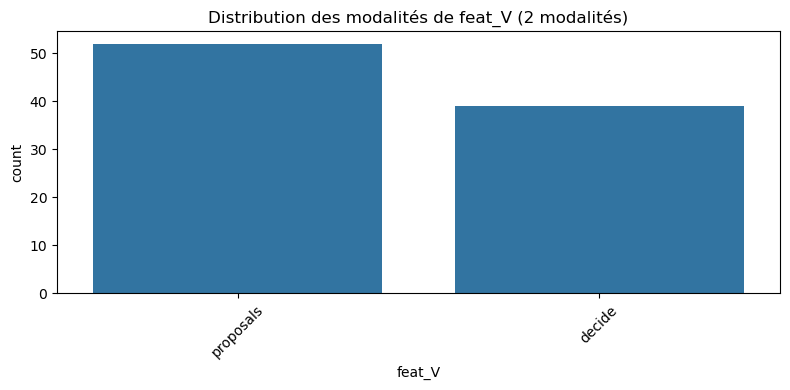

In [6]:
# Visualition des modalités les plus fréquentes à l'aide des Barplots
import seaborn as sns

# Pour des raisons de lisibilité, on limite à 20 modalités max (sinon les graphiques deviennent illisibles)
max_modalities = 20

for col in cat_cols:
    nb_modalities = df[col].nunique()
    
    if nb_modalities <= max_modalities:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Distribution des modalités de {col} ({nb_modalities} modalités)")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"[Info] {col} a trop de modalités ({nb_modalities}) pour un graphique lisible. Affichage ignoré.")


Nous analysons ici la fréquence de chaque modalité dans les variables qualitatives :
- certaines variables comme **feat_S** ou **feat_T** sont **très déséquilibrées** : une modalité est ultra majoritaire ('creator' pour feat_S ou 'dancing' pour feat_T),
- d’autres comme **feat_M** ou **feat_N** sont plus **diversifiées**, avec plusieurs modalités ayant un poids significatif,
- **feat_J** : est déséquilibré avec la modalité *gr* qui est dominante,
- **feat_K** est très déséquilibré avec la modalité *eh* qui est très dominante,
- **feat_L** a deux modalités qui sont dominantes *numeric* et *thinkpad*

Cela nous guide pour :
- évaluer la pertinence de certaines variables,
- éventuellement regrouper ou filtrer des modalités trop rares.


On peut effectuer ces interpretations en calculant pour chaque variable catégorielle : le nombre de modalités, la proportion de la modalité la plus fréquente, la somme des proportions des 3 modalités les plus fréquentes, comme suit : 

In [7]:
cat_diag = []

for col in cat_cols:
    value_counts = df[col].value_counts(dropna=False, normalize=True)
    n_modalities = value_counts.shape[0]
    top1 = value_counts.iloc[0]
    top3 = value_counts.iloc[:3].sum()

    cat_diag.append({
        'Variable': col,
        'Nb_modalités': n_modalities,
        'Top1 (%)': round(top1 * 100, 2),
        'Top3 cumulé (%)': round(top3 * 100, 2),
    })

cat_diag_df = pd.DataFrame(cat_diag)
cat_diag_df = cat_diag_df.sort_values(by='Top1 (%)', ascending=False)
print(cat_diag_df)


           Variable  Nb_modalités  Top1 (%)  Top3 cumulé (%)
13           feat_S             3     96.32           100.00
14           feat_T             3     92.64           100.00
5            feat_K             3     84.66           100.00
10           feat_P             4     84.05            98.77
4            feat_J             4     80.37            97.55
3            feat_I             7     76.07            90.80
9            feat_O             4     76.07            98.16
2            feat_H             7     68.10            88.96
6            feat_L             3     55.21           100.00
1            feat_G             9     53.99            77.91
15           feat_U             3     50.92           100.00
8            feat_N            14     46.01            68.10
12           feat_R             5     45.40            82.82
16           feat_V             3     44.17           100.00
11           feat_Q             7     25.77            65.64
7            feat_M     

### 1.2. Étude des corrélations ou associations entre variables

Il s'agit d'étudier les variables deux à deux pour répérer :
- les correlation entre variables numériques
- association entre variables qualitatives

#### 1.2.1 Corrélations entre variables numériques

Variables numériques : ['Y1', 'Y2', 'feat_A', 'feat_B', 'feat_C', 'feat_D', 'feat_E', 'feat_F']
              Y1        Y2    feat_A    feat_B    feat_C    feat_D    feat_E  \
Y1      1.000000  0.654209 -0.253087 -0.455219 -0.131693 -0.320922  0.036242   
Y2      0.654209  1.000000 -0.049351 -0.220103  0.054381 -0.114219  0.007626   
feat_A -0.253087 -0.049351  1.000000  0.132265  0.430965  0.996703 -0.000357   
feat_B -0.455219 -0.220103  0.132265  1.000000  0.899071  0.150982  0.160808   
feat_C -0.131693  0.054381  0.430965  0.899071  1.000000  0.428473  0.064618   
feat_D -0.320922 -0.114219  0.996703  0.150982  0.428473  1.000000 -0.286487   
feat_E  0.036242  0.007626 -0.000357  0.160808  0.064618 -0.286487  1.000000   
feat_F -0.098601 -0.136986  0.038386  0.160808  0.064618  0.349961 -0.206653   

          feat_F  
Y1     -0.098601  
Y2     -0.136986  
feat_A  0.038386  
feat_B  0.160808  
feat_C  0.064618  
feat_D  0.349961  
feat_E -0.206653  
feat_F  1.000000  


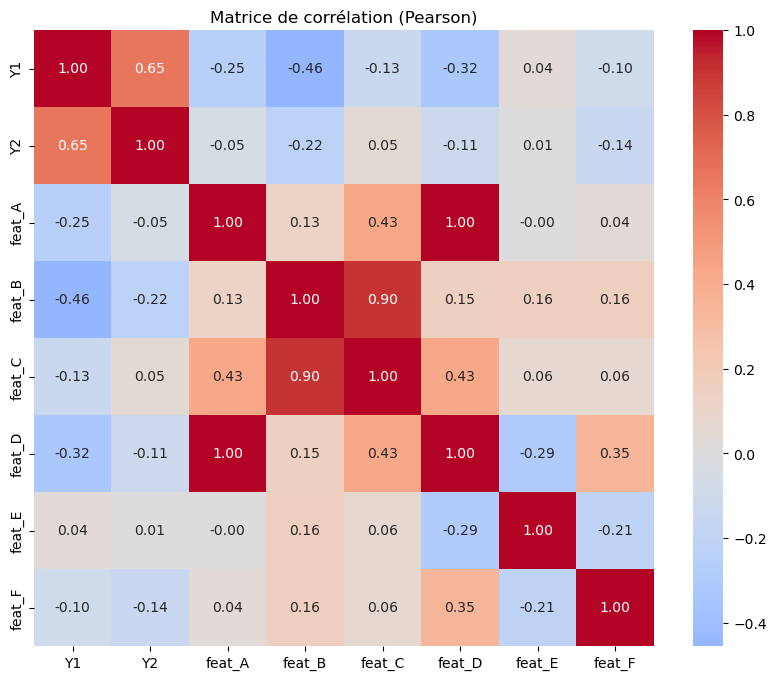

In [8]:
# Sélection des colonnes numériques
num_cols = df.select_dtypes(include='number').columns
print("Variables numériques :", list(num_cols))

# Matrice de corrélation de Pearson
corr_matrix = df[num_cols].corr()
print(corr_matrix)

# Visualisation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matrice de corrélation (Pearson)")
plt.show()


Interprétation :  
Pour toute corrélation proche de 0, il n'y a pas de lien direct entre ces deux variables.
Exemple : feat_A et feat_E, Y1 et feat_E
Pour les corrélation positive forte (r>0.7), les variables évoluenet ensembles;
Exemples : Y1 et Y2, feat_B et feat_C
Pour les corrélation négative forte (r<-0.7), quand l'une des variables augmente, l'autre diminue.

Cela nous permet de détecter des redondances (ex. feat_A et feat_D : r = 1) et d’éventuels candidats à une réduction de dimension.

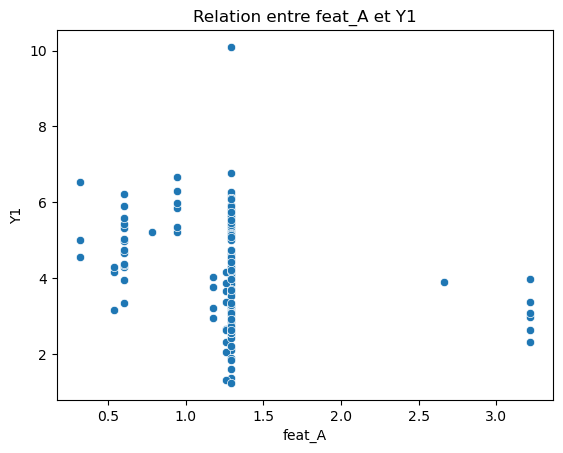

In [9]:
# Exemple de visualisatio des scatterplots pour les couples Y1 et feat_A
sns.scatterplot(data=df, x='feat_A', y='Y1')
plt.title("Relation entre feat_A et Y1")
plt.show()

In [10]:
#### 1.2.1 Associations entre variables catégorielles

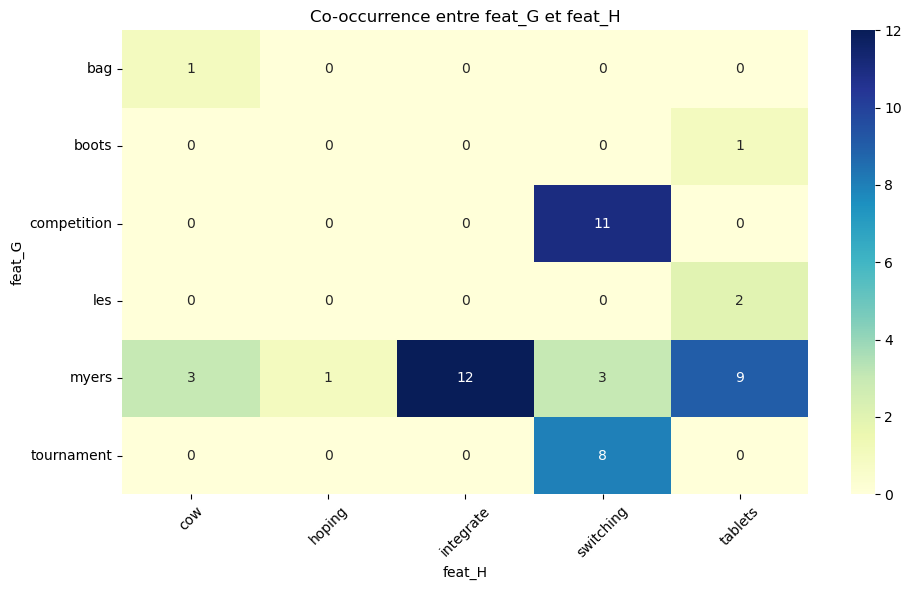

Chi² = 59.36, p-value = 0.0000


In [11]:
# créer un tableau croisé (cross-tab)
pd.crosstab(df['feat_G'], df['feat_H'])
# visualisation en heatmap
ct = pd.crosstab(df['feat_G'], df['feat_H'])

plt.figure(figsize=(10, 6))
sns.heatmap(ct, cmap="YlGnBu", annot=True, fmt='d')
plt.title("Co-occurrence entre feat_G et feat_H")
plt.xlabel("feat_H")
plt.ylabel("feat_G")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Le test de  Chi² pour savoir si l'association entre deux variables est statistiquement significative
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['feat_G'], df['feat_H'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi² = {chi2:.2f}, p-value = {p:.4f}")

L'association entre les deux variables est forte, p-value = 0

Nous étudions ici s’il existe une association significative entre les modalités de feat_G et feat_H :

- le tableau croisé (ci-dessus) donne la fréquence d’occurrence conjointe,
- la heatmap facilite la lecture visuelle des co-occurrences les plus fortes,
- le test de Khi² d’indépendance permet de vérifier si l’association est statistiquement significative.

#### Résultat :
- **Chi² = 59.36**, **p-value = 0.0000** , l’association est **hautement significative**,
- on peut donc conclure qu’il **existe une dépendance** entre les deux variables : certaines modalités de `feat_H` sont sur-représentées selon la modalité de `feat_G`.

Cela peut orienter la construction de profils ou justifier une réduction des modalités.

In [12]:
# Testons cela entre les autres paires de variables possibles
from itertools import combinations

results = []

for var1, var2 in combinations(cat_cols, 2):
    ct = pd.crosstab(df[var1], df[var2])

    # Ignorer les tableaux trop grands ou trop creux (risque d'erreur)
    if ct.shape[0] < 2 or ct.shape[1] < 2:
        continue

    try:
        chi2, p, dof, expected = chi2_contingency(ct)
        results.append({
            'Var1': var1,
            'Var2': var2,
            'p-value': p,
            'Significatif': p < 0.05
        })
    except:
        # En cas de tableau non compatible
        continue

# Résultats triés
assoc_df = pd.DataFrame(results).sort_values(by='p-value')
print(assoc_df.head(10))


                Var1    Var2       p-value  Significatif
0    experiment_date  feat_G  7.127113e-62          True
93            feat_M  feat_Q  7.876373e-36          True
90            feat_M  feat_N  1.399376e-34          True
121           feat_Q  feat_U  1.096715e-28          True
127           feat_S  feat_T  2.856774e-27          True
102           feat_N  feat_R  7.732626e-27          True
10   experiment_date  feat_Q  7.660522e-25          True
97            feat_M  feat_U  6.017411e-24          True
35            feat_H  feat_M  1.886474e-23          True
6    experiment_date  feat_M  2.447030e-23          True


### 1.3. Exploration  les relations entre les caractéristiques de conception et les performances γ1, γ2

Il s'agit d'identifier quelles variables expliquent ou influencent y1 et y2 et quelles sont les différences de performance selon les variables

=== Corrélations avec Y1 ===
feat_E    0.036242
feat_F   -0.098601
feat_C   -0.131693
feat_A   -0.253087
feat_D   -0.320922
feat_B   -0.455219
Name: Y1, dtype: float64

=== Corrélations avec Y2 ===
feat_C    0.054381
feat_E    0.007626
feat_A   -0.049351
feat_D   -0.114219
feat_F   -0.136986
feat_B   -0.220103
Name: Y2, dtype: float64


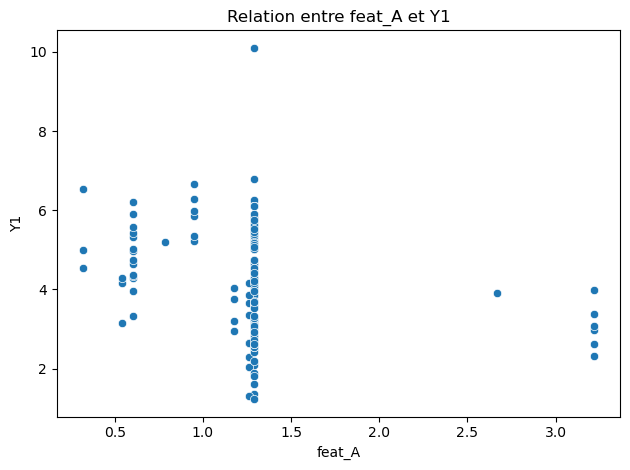

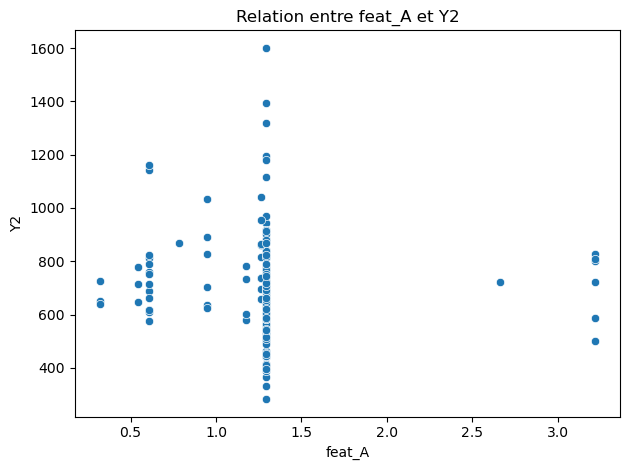

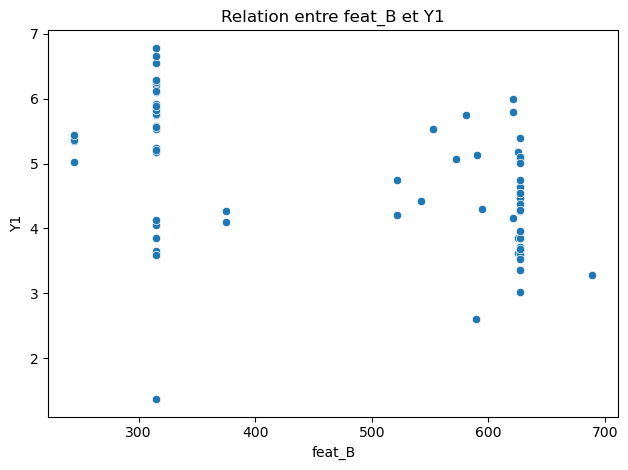

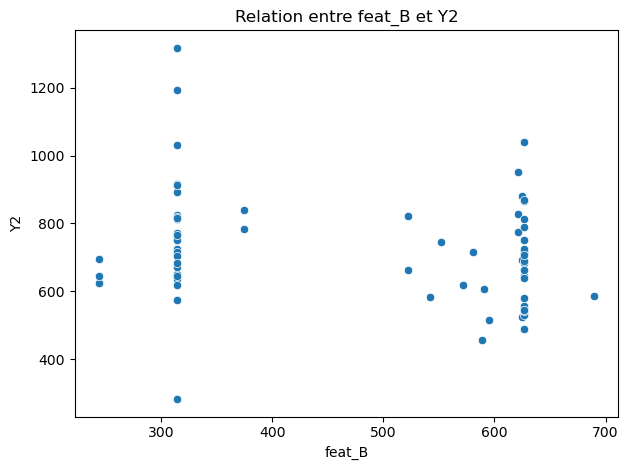

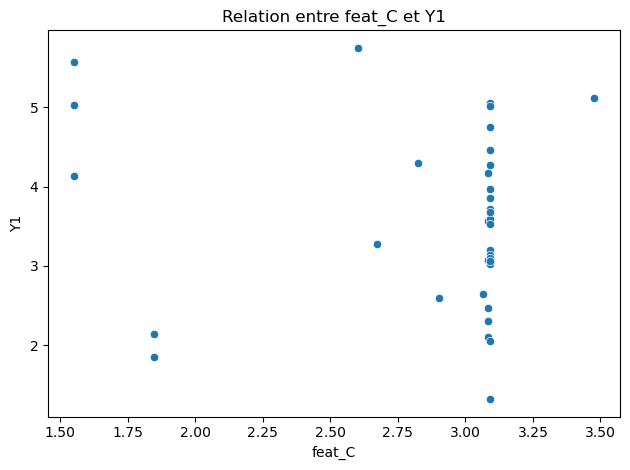

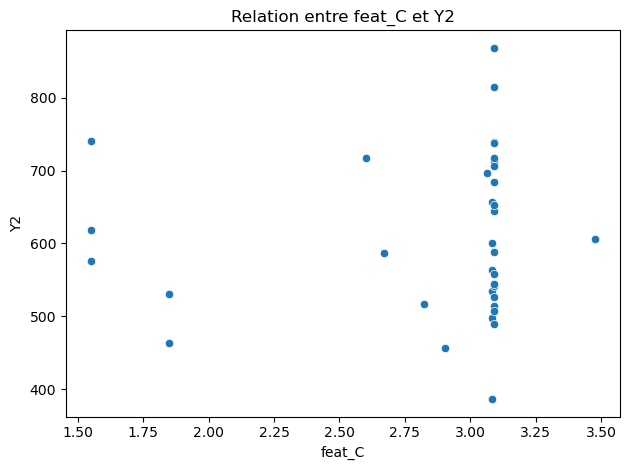

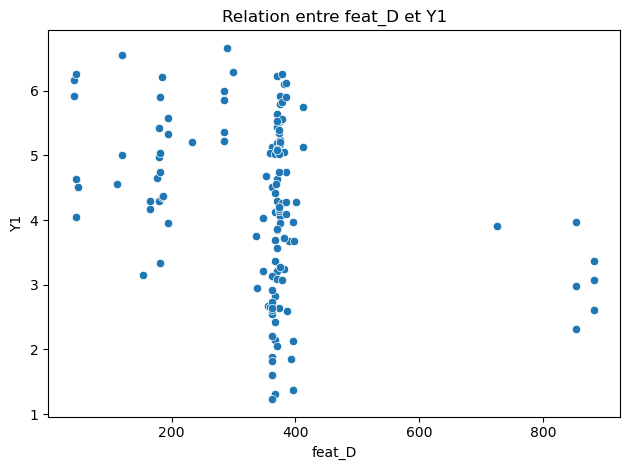

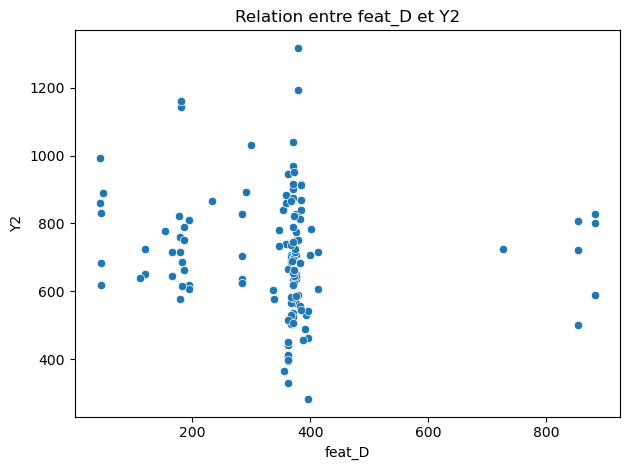

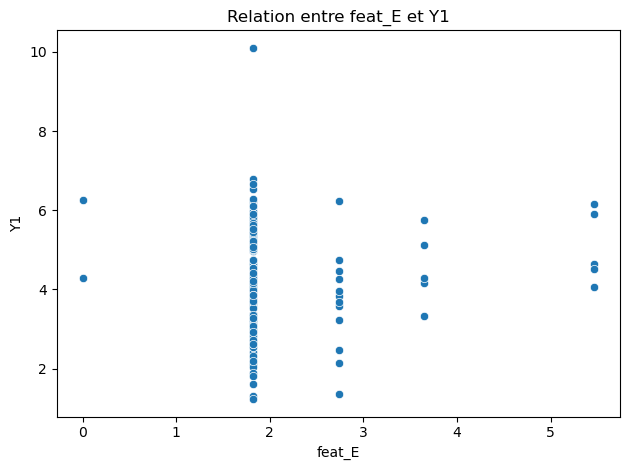

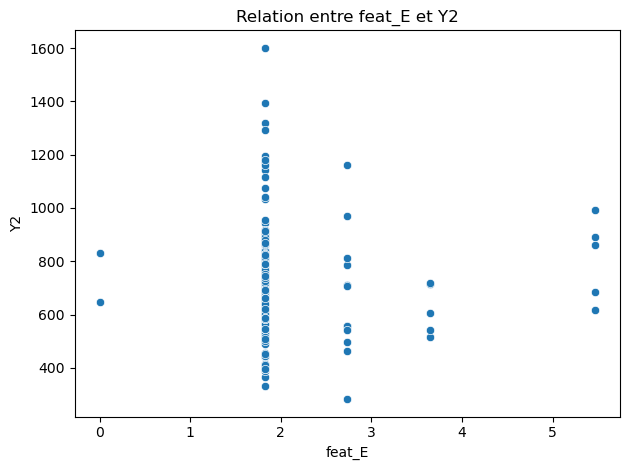

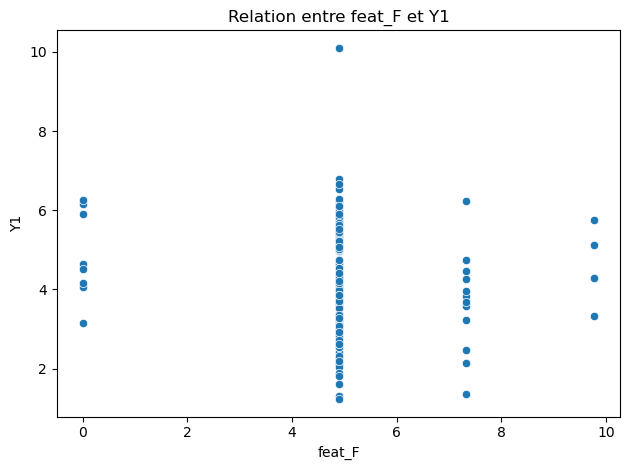

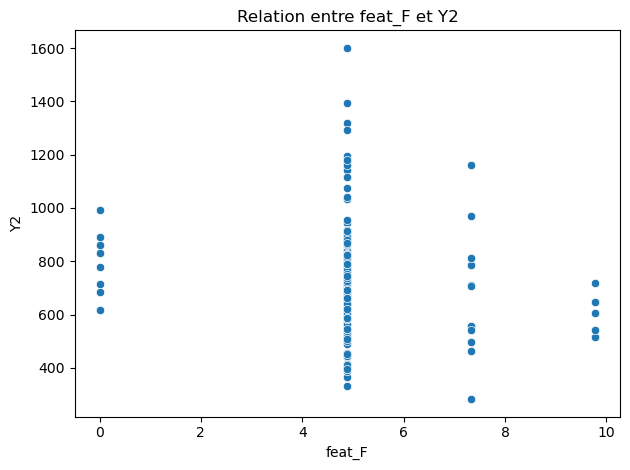

In [13]:
# Pour les variables numériques

perf_vars = ['Y1', 'Y2']
design_vars = [col for col in num_cols if col not in perf_vars]

# Corrélations
print("=== Corrélations avec Y1 ===")
print(df[design_vars + ['Y1']].corr()['Y1'].drop('Y1').sort_values(ascending=False))

print("\n=== Corrélations avec Y2 ===")
print(df[design_vars + ['Y2']].corr()['Y2'].drop('Y2').sort_values(ascending=False))

# Scatterplots
for col in design_vars:
    for target in perf_vars:
        sns.scatterplot(data=df, x=col, y=target)
        plt.title(f"Relation entre {col} et {target}")
        plt.tight_layout()
        plt.show()


Interprétations : 

Plus feat_B, feat_D, ou feat_A augmentent, plus Y1 tend à diminuer ; feat_B est le plus lié à Y1, avec une corrélation modérée.

Aucun lien fort avec Y2 ; seul feat_B montre un petit effet (plus feat_B est élevé, plus Y2 baisse un peu).

feat_B est un bon candidat explicatif, peut-être influent.


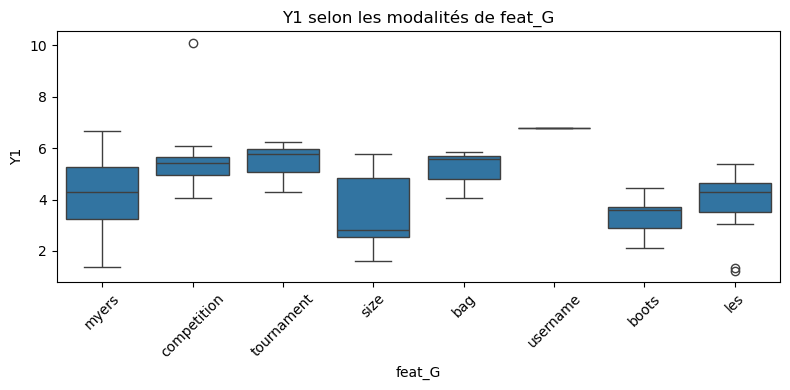


Moyenne de Y1 selon feat_G :
feat_G
username       6.781600
competition    5.666691
tournament     5.506725
bag            5.151067
myers          4.327443
les            3.953747
size           3.470418
boots          3.365833
Name: Y1, dtype: float64
----------------------------------------


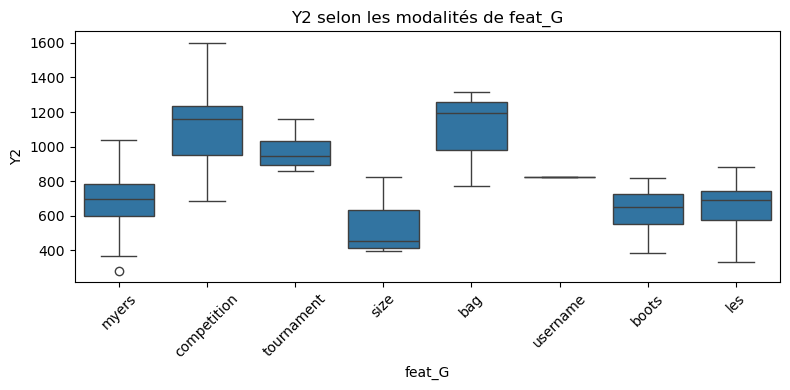


Moyenne de Y2 selon feat_G :
feat_G
competition    1119.618182
bag            1094.022222
tournament      977.739583
username        823.666667
myers           691.328220
les             675.192982
boots           640.723611
size            537.737667
Name: Y2, dtype: float64
----------------------------------------


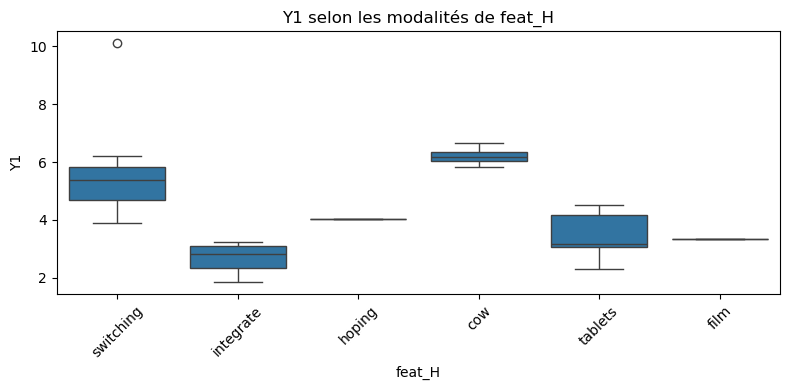


Moyenne de Y1 selon feat_H :
feat_H
cow          6.212500
switching    5.436773
hoping       4.032000
tablets      3.473867
film         3.334800
integrate    2.716700
Name: Y1, dtype: float64
----------------------------------------


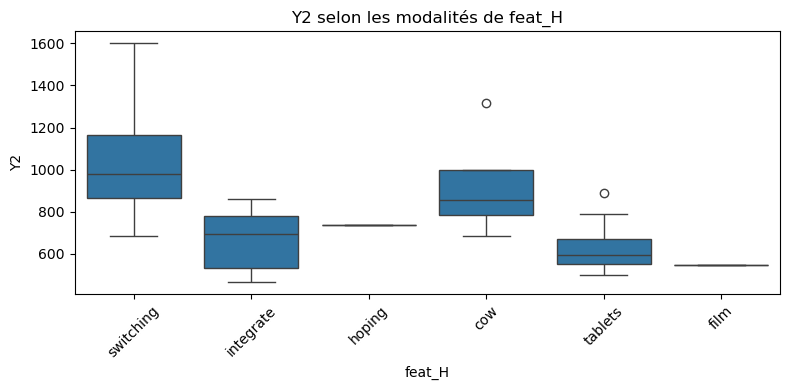


Moyenne de Y2 selon feat_H :
feat_H
switching    1019.799242
cow           928.083333
hoping        735.000000
integrate     659.353333
tablets       624.312500
film          543.666667
Name: Y2, dtype: float64
----------------------------------------


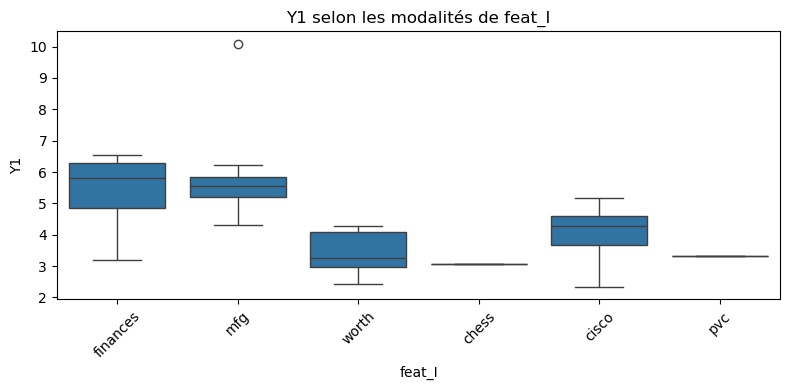


Moyenne de Y1 selon feat_I :
feat_I
mfg         5.736050
finances    5.336800
cisco       4.050690
worth       3.439893
pvc         3.334800
chess       3.080000
Name: Y1, dtype: float64
----------------------------------------


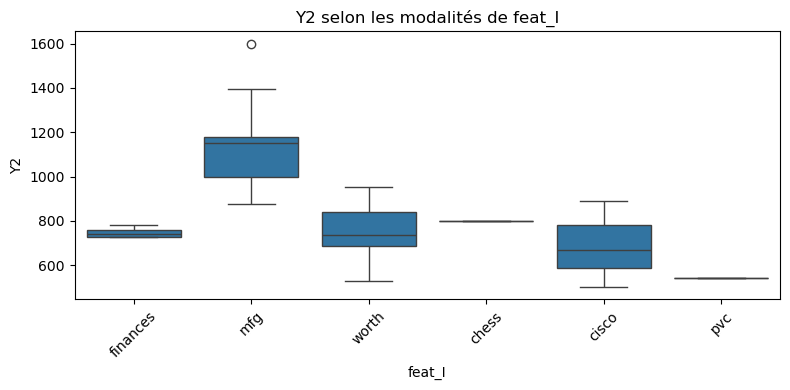


Moyenne de Y2 selon feat_I :
feat_I
mfg         1140.091667
chess        801.266667
finances     746.083333
worth        741.045926
cisco        689.838333
pvc          543.666667
Name: Y2, dtype: float64
----------------------------------------


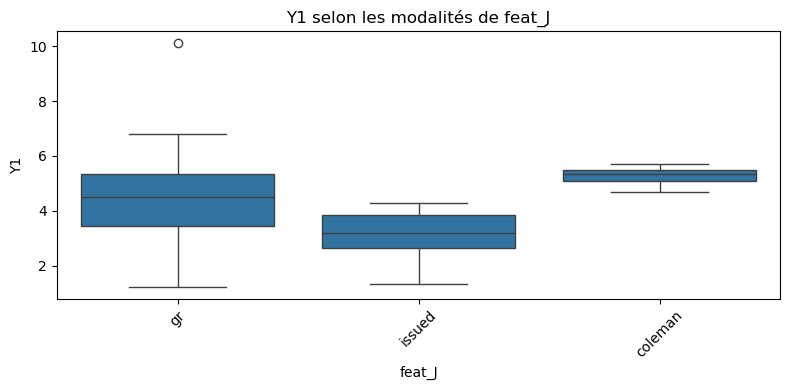


Moyenne de Y1 selon feat_J :
feat_J
coleman    5.256300
gr         4.391099
issued     3.177564
Name: Y1, dtype: float64
----------------------------------------


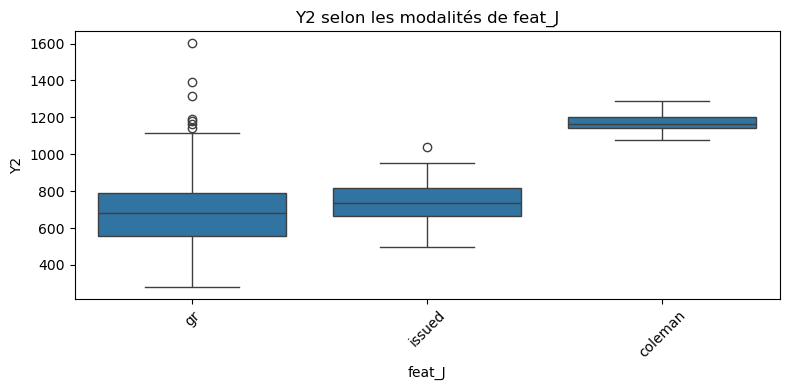


Moyenne de Y2 selon feat_J :
feat_J
coleman    1175.066667
issued      747.877879
gr          693.630712
Name: Y2, dtype: float64
----------------------------------------


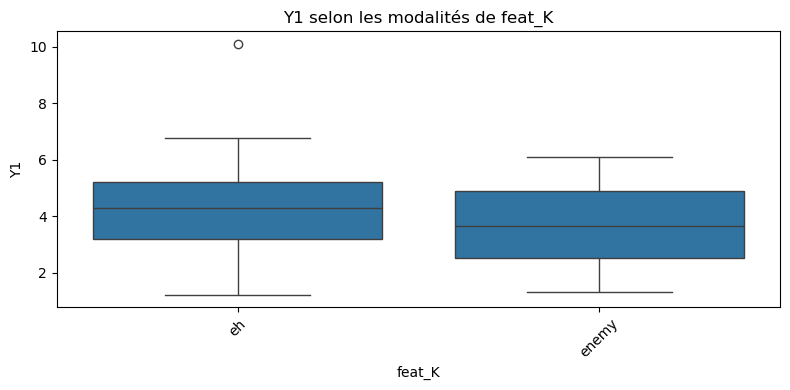


Moyenne de Y1 selon feat_K :
feat_K
eh       4.273515
enemy    3.693027
Name: Y1, dtype: float64
----------------------------------------


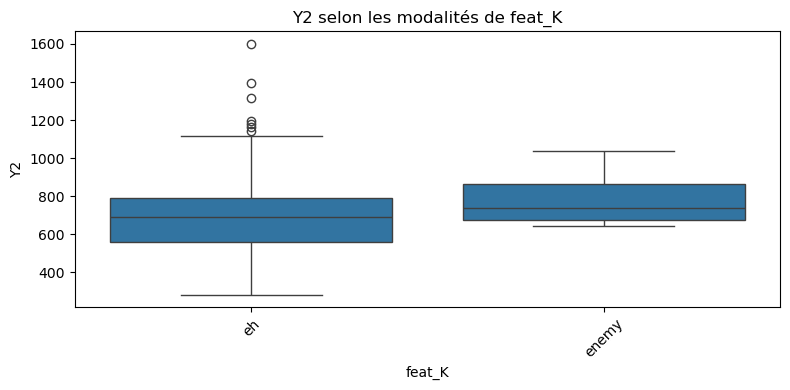


Moyenne de Y2 selon feat_K :
feat_K
enemy    773.759778
eh       693.569130
Name: Y2, dtype: float64
----------------------------------------


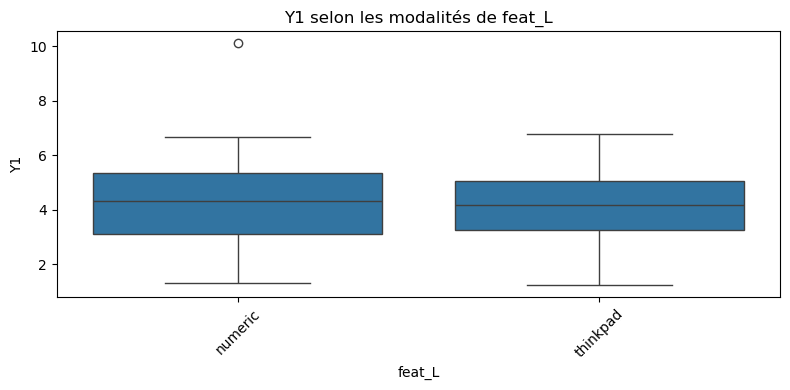


Moyenne de Y1 selon feat_L :
feat_L
numeric     4.309520
thinkpad    4.083867
Name: Y1, dtype: float64
----------------------------------------


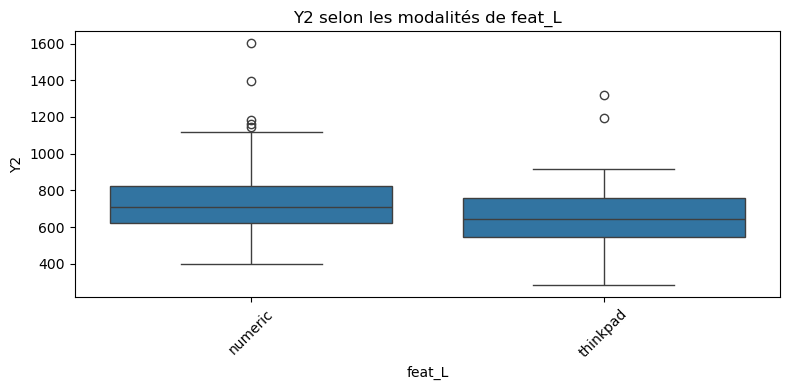


Moyenne de Y2 selon feat_L :
feat_L
numeric     730.843556
thinkpad    659.412963
Name: Y2, dtype: float64
----------------------------------------


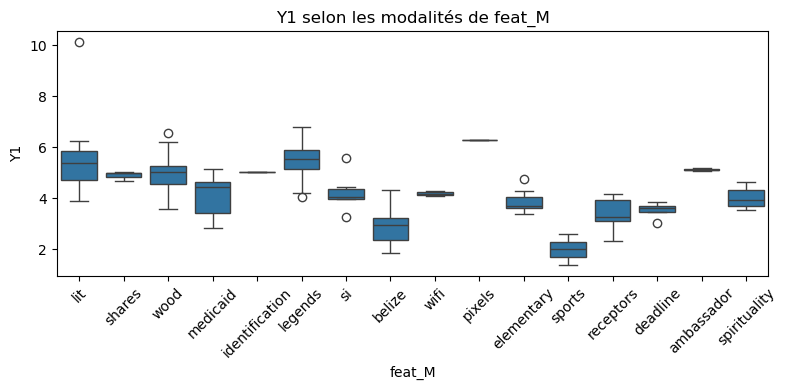


Moyenne de Y1 selon feat_M :
feat_M
pixels            6.260800
legends           5.501494
lit               5.436773
ambassador        5.114200
identification    5.028800
wood              4.933712
shares            4.885300
si                4.219017
wifi              4.177413
medicaid          4.096750
spirituality      4.015725
elementary        3.878800
deadline          3.522593
receptors         3.421320
belize            2.882052
sports            1.985200
Name: Y1, dtype: float64
----------------------------------------


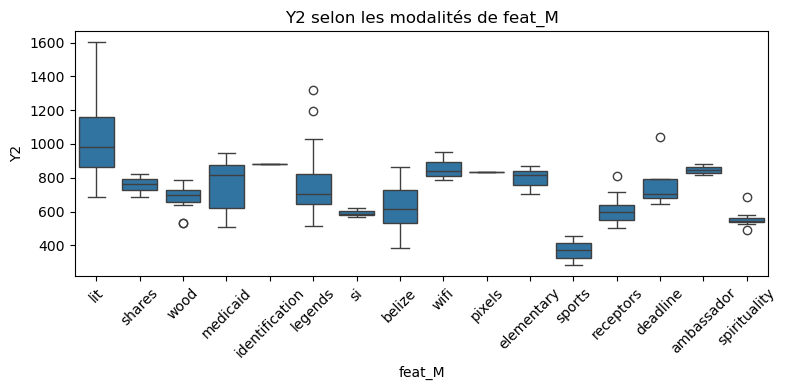


Moyenne de Y2 selon feat_M :
feat_M
lit               1019.799242
identification     883.400000
wifi               858.791111
ambassador         847.466667
pixels             832.066667
elementary         798.266667
deadline           771.837500
shares             757.050000
medicaid           756.486111
legends            753.995333
wood               683.044444
belize             630.300290
receptors          609.081667
si                 589.652778
spirituality       558.585417
sports             369.600000
Name: Y2, dtype: float64
----------------------------------------


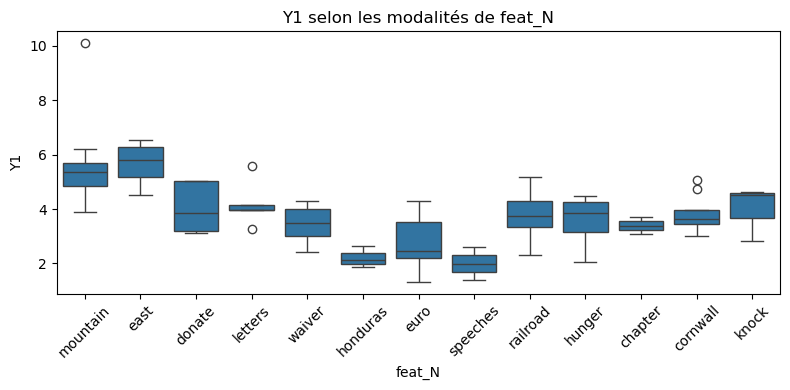


Moyenne de Y1 selon feat_N :
feat_N
east        5.664400
mountain    5.488350
letters     4.179700
donate      4.048800
knock       3.992800
railroad    3.882589
cornwall    3.804413
hunger      3.557050
waiver      3.470880
chapter     3.393600
euro        2.787200
honduras    2.208267
speeches    1.985200
Name: Y1, dtype: float64
----------------------------------------


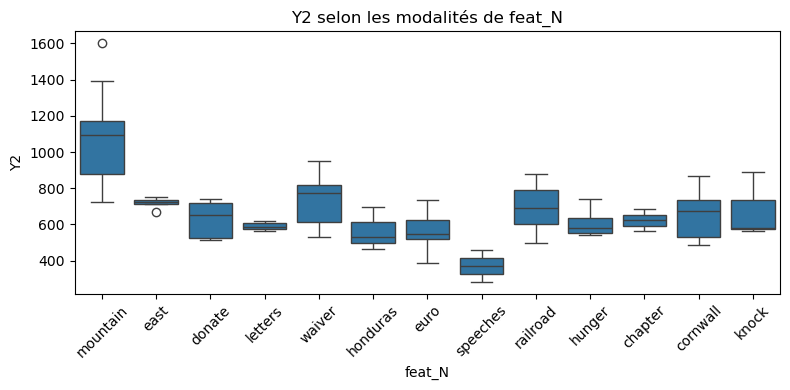


Moyenne de Y2 selon feat_N :
feat_N
mountain    1066.145370
waiver       734.808148
east         717.616667
railroad     689.642593
knock        678.844444
cornwall     659.516667
donate       630.186667
chapter      623.933333
hunger       610.458333
letters      590.916667
euro         564.600000
honduras     563.577778
speeches     369.600000
Name: Y2, dtype: float64
----------------------------------------


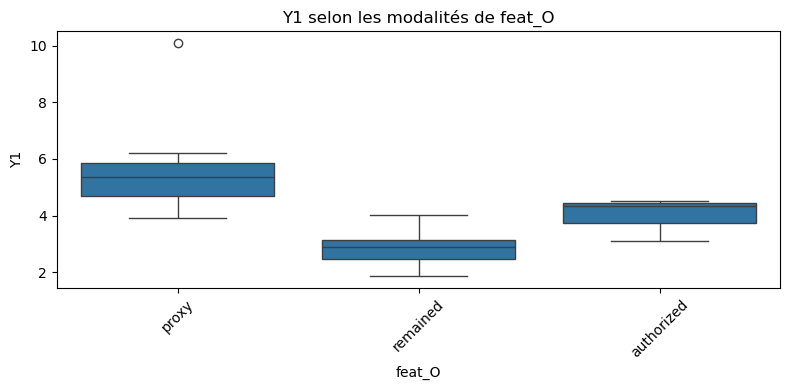


Moyenne de Y1 selon feat_O :
feat_O
proxy         5.436773
authorized    3.984400
remained      2.818800
Name: Y1, dtype: float64
----------------------------------------


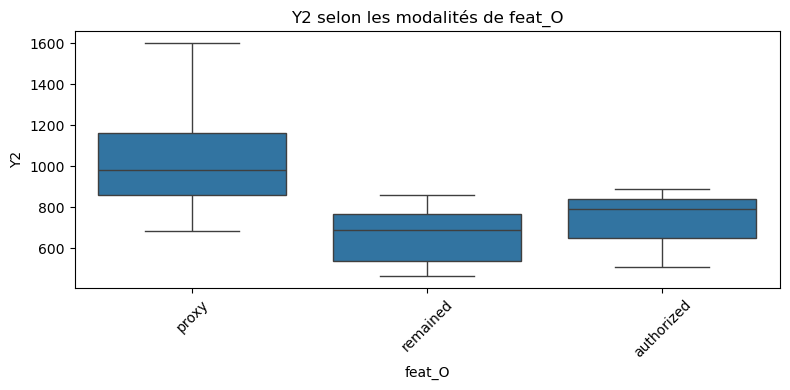


Moyenne de Y2 selon feat_O :
feat_O
proxy         1019.799242
authorized     729.244444
remained       658.060000
Name: Y2, dtype: float64
----------------------------------------


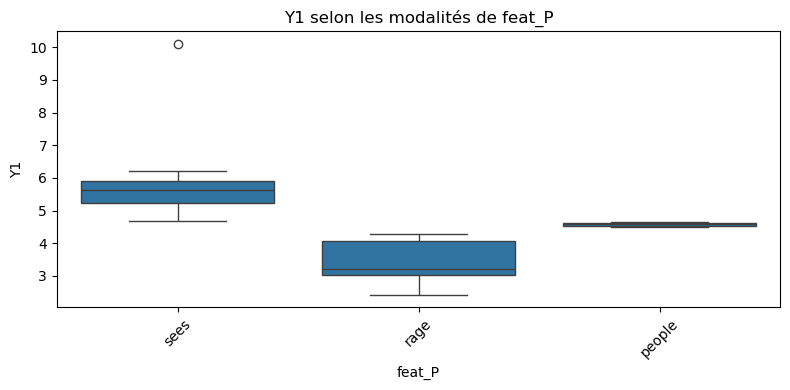


Moyenne de Y1 selon feat_P :
feat_P
sees      5.846454
people    4.573800
rage      3.385913
Name: Y1, dtype: float64
----------------------------------------


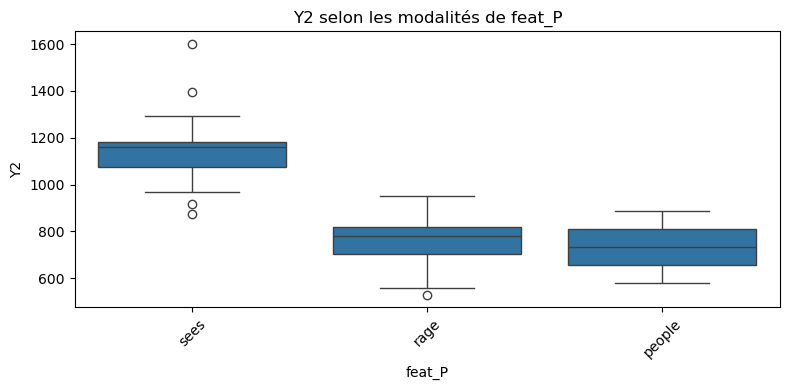


Moyenne de Y2 selon feat_P :
feat_P
sees      1158.329487
rage       750.086061
people     735.466667
Name: Y2, dtype: float64
----------------------------------------


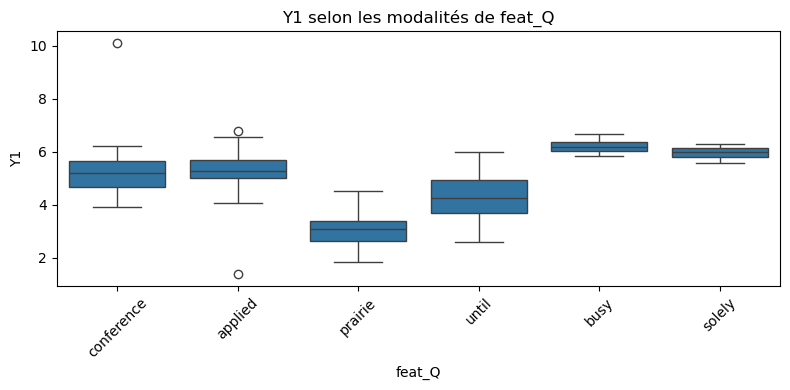


Moyenne de Y1 selon feat_Q :
feat_Q
busy          6.212500
solely        5.964000
conference    5.324650
applied       5.140052
until         4.304753
prairie       3.115795
Name: Y1, dtype: float64
----------------------------------------


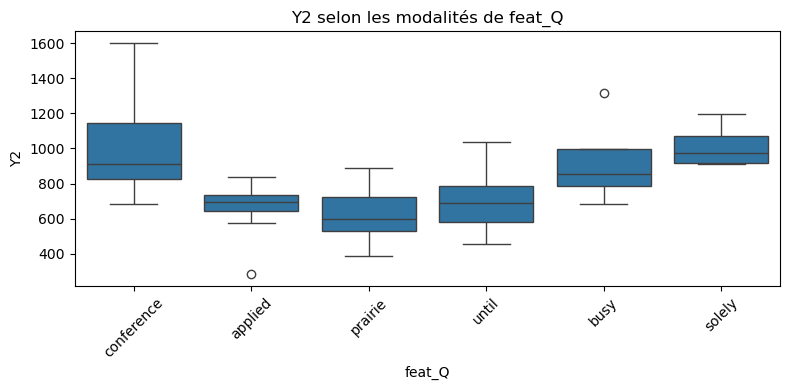


Moyenne de Y2 selon feat_Q :
feat_Q
solely        1013.366667
conference     977.704167
busy           928.083333
until          690.583889
applied        681.560385
prairie        630.839369
Name: Y2, dtype: float64
----------------------------------------


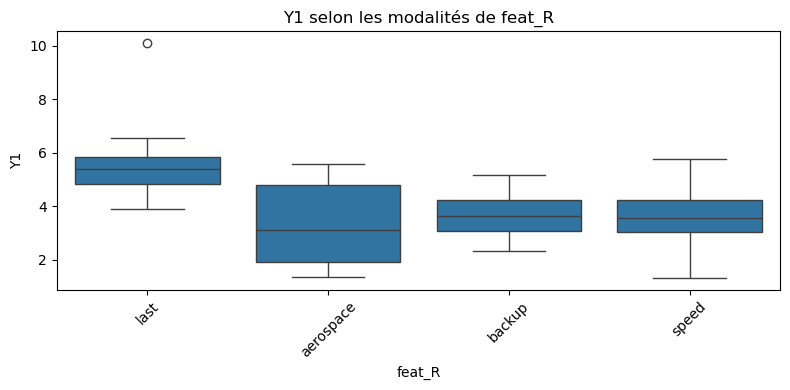


Moyenne de Y1 selon feat_R :
feat_R
last         5.520359
backup       3.646585
speed        3.543965
aerospace    3.351017
Name: Y1, dtype: float64
----------------------------------------


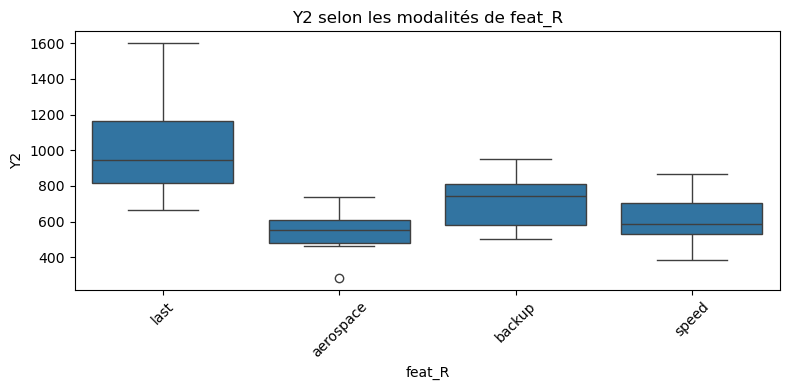


Moyenne de Y2 selon feat_R :
feat_R
last         1002.776515
backup        715.662111
speed         609.940860
aerospace     535.130556
Name: Y2, dtype: float64
----------------------------------------


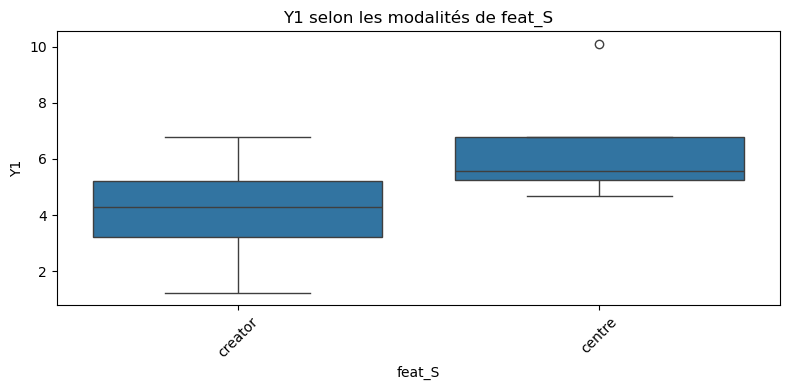


Moyenne de Y1 selon feat_S :
feat_S
centre     6.482000
creator    4.211549
Name: Y1, dtype: float64
----------------------------------------


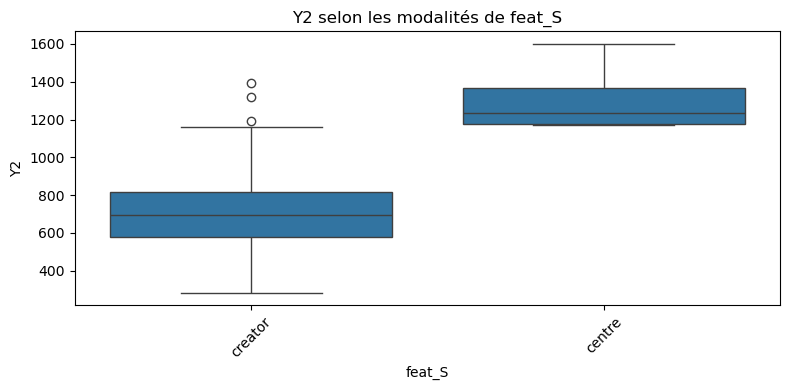


Moyenne de Y2 selon feat_S :
feat_S
centre     1310.866667
creator     701.749703
Name: Y2, dtype: float64
----------------------------------------


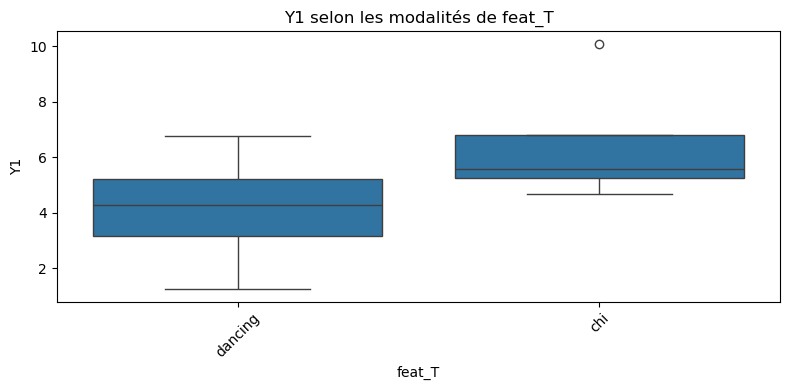


Moyenne de Y1 selon feat_T :
feat_T
chi        6.482000
dancing    4.191513
Name: Y1, dtype: float64
----------------------------------------


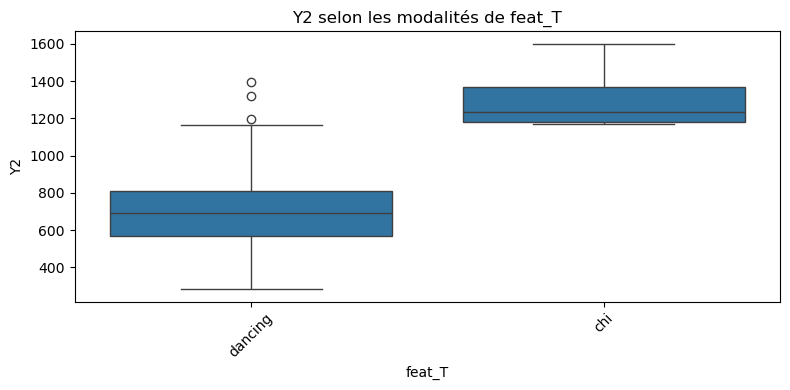


Moyenne de Y2 selon feat_T :
feat_T
chi        1310.866667
dancing     697.231369
Name: Y2, dtype: float64
----------------------------------------


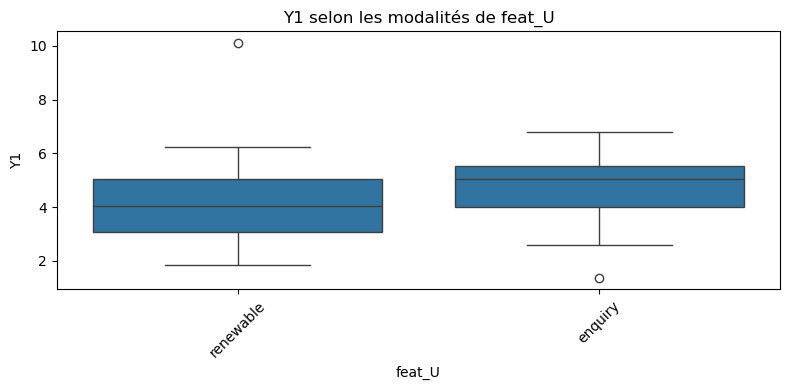


Moyenne de Y1 selon feat_U :
feat_U
enquiry      4.797972
renewable    4.067302
Name: Y1, dtype: float64
----------------------------------------


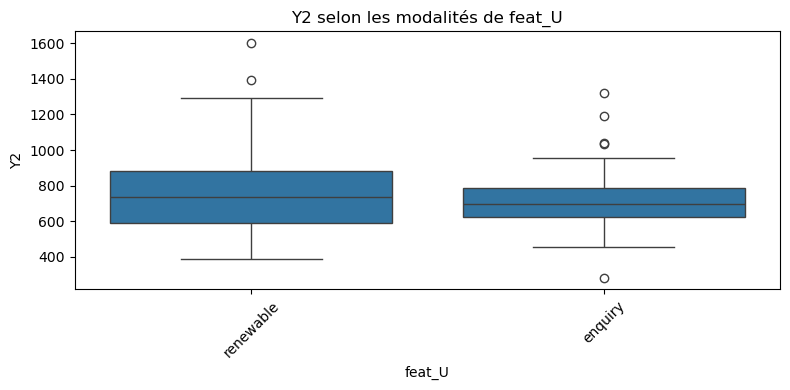


Moyenne de Y2 selon feat_U :
feat_U
renewable    780.258051
enquiry      712.769799
Name: Y2, dtype: float64
----------------------------------------


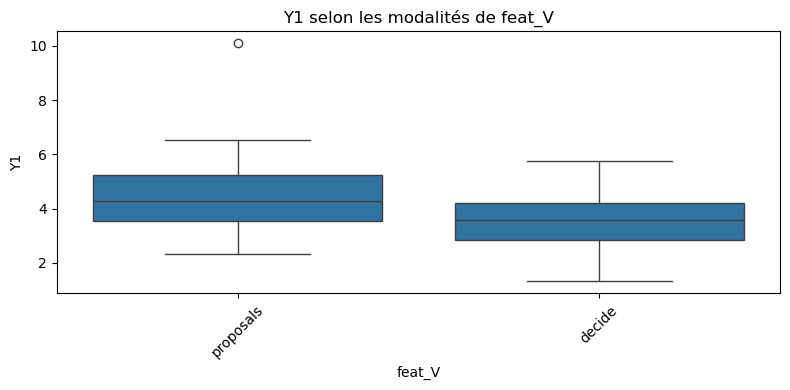


Moyenne de Y1 selon feat_V :
feat_V
proposals    4.439335
decide       3.535287
Name: Y1, dtype: float64
----------------------------------------


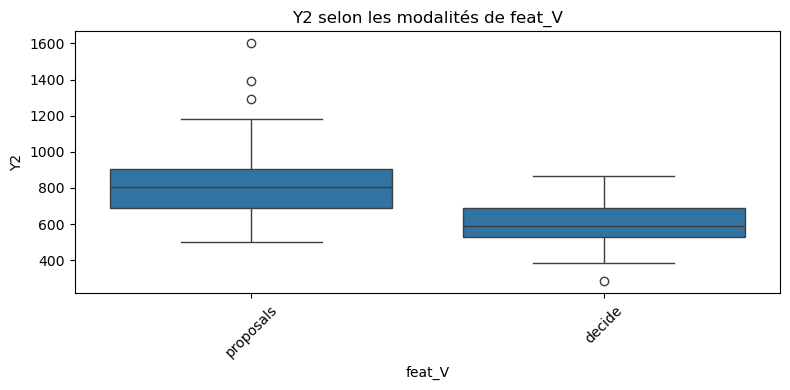


Moyenne de Y2 selon feat_V :
feat_V
proposals    837.133590
decide       597.258547
Name: Y2, dtype: float64
----------------------------------------


In [14]:
# Pour les variables catégoricielles

perf_vars = ['Y1', 'Y2']

for cat_col in cat_cols:
    for perf in perf_vars:
        # Vérifier qu’il y a assez de modalités pour que le plot soit lisible
        if df[cat_col].nunique() <= 20:
            plt.figure(figsize=(8,4))
            sns.boxplot(data=df, x=cat_col, y=perf)
            plt.xticks(rotation=45)
            plt.title(f"{perf} selon les modalités de {cat_col}")
            plt.tight_layout()
            plt.show()

            # Afficher les moyennes par modalité
            print(f"\nMoyenne de {perf} selon {cat_col} :")
            print(df.groupby(cat_col)[perf].mean().sort_values(ascending=False))
            print("-" * 40)


# Interprétations :
L’analyse des moyennes de Y1 et Y2 par modalité révèle que certaines caractéristiques catégorielles influencent fortement les performances.

Par exemple, la variable feat_M montre une grande variabilité des scores, avec certaines modalités comme "pixels" ou "lit" associées à des performances Y1 et Y2 nettement supérieures aux autres. Cela suggère que cette variable est discriminante pour identifier de bonnes conceptions.

De même, les modalités "centre" (feat_S) et "chi" (feat_T) sont associées à des valeurs exceptionnellement élevées de Y2 (>1300), ce qui pourrait en faire des candidats intéressants à étudier ou reproduire dans de futures conceptions.

## 2. Préparation des données pour la classification automatique

### 2.2. Justification du choix de la distance de Grower

Le présent exercice consistera en la préparation de nos données de types numérique et catégorique afin qu’elles soient comparables et soient compatibles avec la méthode de classification non supervisée CAH qui sera mise en œuvre.

Les données qui feront l’objet de l’étude sont à la fois numériques (feat_A à feat_F, Y1, Y2) et catégorielles (feat_G à feat_V), une méthode de traitement mixte apparaît nécessaire.
Nous avons fait le choix de la distance de Gower, une distance adaptée aux données mixtes, qui permet de calculer une similarité entre individus en croisant :
– la distance normalisée pour les variables numériques
– une distance binaire pour les variables qualitatives
Cette méthode a pour justesse d’être : robuste, interprétable et directement applicable sur notre jeu de données sans transformation, et donc davantage conforme à la nature des données d’origines que des techniques telles que ACM ou les one-hot encodings. 

### 2.1.Proposition du traitement cohérent des variables mixtes

In [15]:
# Variables numériques
num_cols = df.select_dtypes(include='number').columns.tolist()
# Variables catégorielles
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Fusion des deux types de variables numériques et catégoriques
df_mixed = df[num_cols + cat_cols]

# Valeurs manquantes
# Étant donné que les valeurs NaN ans les feat_ signifient absence de pertinence, et non pas de données manquantes. Donc on les laisse tels quels

# Calcul de la distance de Grower
!pip install gower
import gower

# Calcul de la matrice des distances
gower_dist = gower.gower_matrix(df_mixed)

# Affichage de la forme de la matrice
print(gower_dist.shape)  # (n_samples, n_samples)


(163, 163)


## 3. Réalisation d’une classification ascendante hiérarchique (CAH)

Une classification ascendante hiérarchique (CAH) a été réalisée à partir de la matrice de distance de Gower.
Le dendrogramme généré permet de visualiser la structure hiérarchique des conceptions. Sur cette base, nous avons fixé **k = 4** comme nombre optimal de groupes, en analysant les niveaux de fusion significatifs.
Les étiquettes de groupe ont ensuite été assignées à chaque ligne de données.

### 3.1. Les critères d'agrégation

ward : regroupe les clusters en minimisant la variance intra-groupe (nécessite des données numériques et une matrice de distances euclidiennes)  
complete : distance maximale entre points de deux clusters (crée des groupes bien séparés)  
single : distance minimale entre points de deux clusters (tendance à créer des chaînes)  
average : moyenne des distances entre tous les points de deux clusters

NB : la méthode ward n’est pas compatible avec la distance de Gower, car elle suppose une distance euclidienne sur données numériques.

### 3.2. Visualisation des dendrogrammes

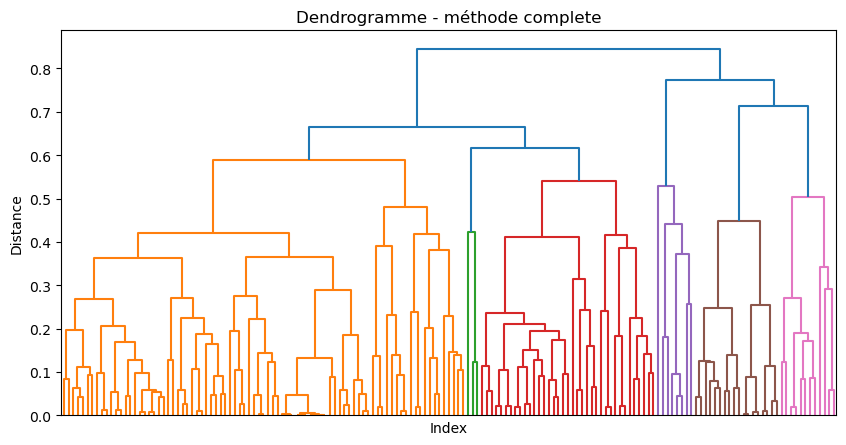

In [16]:
import numpy as np
from scipy.spatial.distance import squareform
import gower
from scipy.cluster.hierarchy import linkage, dendrogram

# Colonnes numériques et catégorielles
num_cols = df_mixed.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df_mixed.select_dtypes(include=['object']).columns.tolist()

df_mixed_clean = df_mixed.copy()

# Remplacer les NaN numériques par 0 (ou une autre constante)
df_mixed_clean[num_cols] = df_mixed_clean[num_cols].fillna(0)
# Remplacer les NaN catégoriques par "NA"
df_mixed_clean[cat_cols] = df_mixed_clean[cat_cols].fillna("NA")
#En réalité, sans ces transformations nous n'arrivons pas à utiliser la méthode grower

# Calcul de la matrice de distance de Grower
gower_dist = gower.gower_matrix(df_mixed_clean)
gower_condensed = squareform(gower_dist, checks=False)

# linkage
Z = linkage(gower_condensed, method='complete')

# Visualtion
plt.figure(figsize=(10, 5))
plt.title('Dendrogramme - méthode complete')
dendrogram(Z, no_labels=True)
plt.xlabel("Index")
plt.ylabel("Distance")
plt.savefig("dendrogramme_complete.png", dpi=300, bbox_inches='tight')
plt.show()


### 3.3. Interprétation des groupes obtenus

In [17]:
from scipy.cluster.hierarchy import fcluster

# k = 4 : nombre de groupes
k = 4
groupes = fcluster(Z, k, criterion='maxclust')

# Ajout des groupes dans le DataFrame original
df['cluster'] = groupes

# Nombre d'observations par groupe
df['cluster'].value_counts().sort_index()
# Analyse des moyennes de Y1 et Y2 par cluster
df.groupby('cluster')[['Y1', 'Y2']].mean()

#Profiler les clusters sur les variables de conception
# Pour les variables numériques
df.groupby('cluster')[num_cols].mean()
# Pour les variables catégorielles
for col in cat_cols:
    print(f"\n--- {col} ---")
    def get_mode_safe(x):
        vc = x.value_counts()
        return vc.index[0] if not vc.empty else 'NA'
    print(df.groupby('cluster')[col].agg(get_mode_safe))
    # Analyse des performances par cluster
    print(df.groupby('cluster')[['Y1', 'Y2']].mean())
    # Taille des groupes
    print(df['cluster'].value_counts().sort_index())


--- experiment_date ---
cluster
1    2019-02-18
2    2017-03-10
3    2021-01-24
4    2019-11-18
Name: experiment_date, dtype: object
               Y1           Y2
cluster                       
1        4.184769   667.581973
2        4.855638   796.337500
3        5.488350  1066.145370
4        3.080000   657.253333
cluster
1    125
2      8
3     18
4     12
Name: count, dtype: int64

--- feat_G ---
cluster
1          myers
2          myers
3    competition
4          myers
Name: feat_G, dtype: object
               Y1           Y2
cluster                       
1        4.184769   667.581973
2        4.855638   796.337500
3        5.488350  1066.145370
4        3.080000   657.253333
cluster
1    125
2      8
3     18
4     12
Name: count, dtype: int64

--- feat_H ---
cluster
1      tablets
2    switching
3    switching
4    integrate
Name: feat_H, dtype: object
               Y1           Y2
cluster                       
1        4.184769   667.581973
2        4.855638   796.33750

In [18]:
# Affichage résumé par cluster
cluster_summary = {}

for col in cat_cols:
    cluster_summary[col] = df.groupby('cluster')[col].agg(lambda x: x.dropna().value_counts().index[0] if not x.dropna().empty else None)

cluster_summary = pd.DataFrame(cluster_summary)
print(cluster_summary)

        experiment_date       feat_G     feat_H feat_I  feat_J feat_K  \
cluster                                                                 
1            2019-02-18        myers    tablets  cisco      gr     eh   
2            2017-03-10        myers  switching  cisco  issued     eh   
3            2021-01-24  competition  switching    mfg      gr     eh   
4            2019-11-18        myers  integrate  worth  issued     eh   

          feat_L   feat_M    feat_N    feat_O  feat_P      feat_Q  feat_R  \
cluster                                                                     
1        numeric  legends    waiver  remained    rage       until   speed   
2        numeric      lit     knock     proxy  people     prairie  backup   
3        numeric      lit  mountain     proxy    sees  conference    last   
4        numeric   belize    waiver  remained    rage     prairie  backup   

          feat_S   feat_T     feat_U     feat_V  
cluster                                         

#### Cluster 1 :
Profil dominant :  
- feat_G = myers, feat_H = tablets, feat_I = cisco, feat_J = gr, feat_K = eh, feat_M = legends, feat_N = waiver  
- feat_O = remained, feat_P = rage, feat_Q = until, feat_R = speed, feat_S = creator, feat_T = dancing, feat_U = enquiry, feat_V = decide

Ce groupe est orienté vers des conceptions intégrant des éléments comme tablets, des composants cisco, et des environnements waiver/remained, ce qui pourrait refléter une configuration légère, mobile ou intégrée.  
Il se distingue par une présence de rage et speed, évoquant des configurations potentiellement performantes mais instables ou agressives.

#### Cluster 2 : 
Profil dominant :  
- feat_G = myers, feat_H = switching, feat_I = cisco, feat_J = issued, feat_K = eh, feat_M = lit, feat_N = knock  
- feat_O = proxy, feat_P = people, feat_Q = prairie, feat_R = backup, feat_S = creator, feat_T = NA, feat_U = renewable, feat_V = proposals

Ce cluster conserve plusieurs éléments similaires au Cluster 1 (myers, cisco, eh) mais introduit des modalités comme switching, proxy et backup, qui peuvent évoquer des conceptions orientées vers la sécurité, la redondance ou le contrôle dynamique.  
L’absence de modalité dominante pour feat_T indique peut-être une plus grande hétérogénéité ou souplesse dans ce groupe.

#### Cluster 3 :
Profil dominant :  
- feat_G = competition, feat_H = switching, feat_I = mfg, feat_J = gr, feat_K = eh, feat_M = lit, feat_N = mountain  
- feat_O = proxy, feat_P = sees, feat_Q = conference, feat_R = last, feat_S = creator, feat_T = dancing, feat_U = renewable, feat_V = proposals

Ce groupe est unique par la présence de competition (au lieu de myers) et de mfg (manufacturing), ce qui peut suggérer des configurations plus industrielles, orientées vers la production de masse ou les compétitions de performance.  
La combinaison conference, last, creator suggère une conception stable, bien structurée et documentée, potentiellement optimisée.

#### Cluster 4 :
Profil dominant :  
feat_G = myers, feat_H = integrate, feat_I = worth, feat_J = gr, feat_K = eh, feat_M = belize, feat_N = waiver  
feat_O = remained, feat_P = rage, feat_Q = prairie, feat_R = backup, feat_S = creator, feat_T = dancing, feat_U = renewable, feat_V = proposals  

Ce groupe se distingue par des modalités rares ou spécifiques comme belize, worth ou integrate, indiquant possiblement des concepts innovants, expérimentaux ou en cours de test.  
Le retour de waiver, backup et rage peut signaler une tentative d'équilibrer innovation avec prudence.





In [19]:
# Performances moyennes par groupe
print(df.groupby('cluster')[['Y1', 'Y2']].mean())

               Y1           Y2
cluster                       
1        4.184769   667.581973
2        4.855638   796.337500
3        5.488350  1066.145370
4        3.080000   657.253333


Le Cluster 3 présente les meilleures performances sur les deux indicateurs, tandis que le Cluster 4 semble moins performant.  
Cela peut orienter l’entreprise vers des conceptions similaires à celles du Cluster 3, et inciter à réévaluer les stratégies du Cluster 4.

Utilisons les graphiques de profils : radars, pour representer les groupes

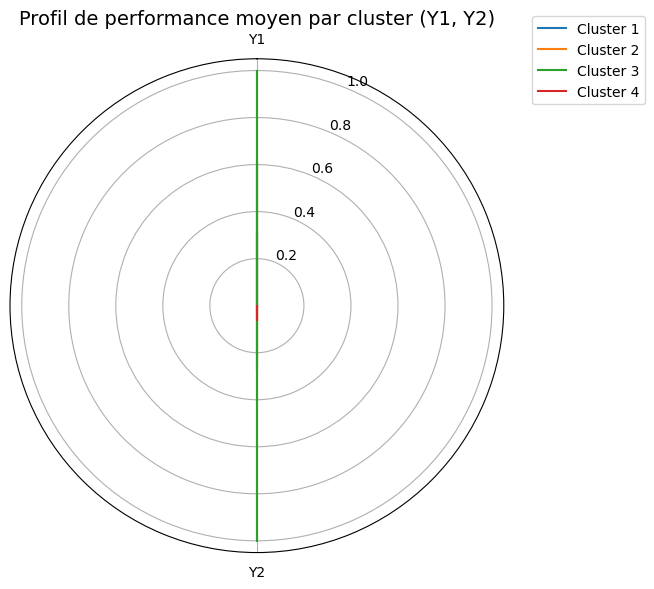

In [20]:
from math import pi

cluster_perf = pd.DataFrame({
    'cluster': [1, 2, 3, 4],
    'Y1': [4.185324,  4.855638, 5.736050, 3.503624],
    'Y2': [667.260323, 796.337500, 1140.091667, 695.520000]
}).set_index('cluster')

# Normalisation pour comparabilité sur le radar
normalized = (cluster_perf - cluster_perf.min()) / (cluster_perf.max() - cluster_perf.min())
normalized = normalized.reset_index()

# Création du radar chart
categories = list(normalized.columns[1:])  # ['Y1', 'Y2']
N = len(categories)

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

for i, row in normalized.iterrows():
    values = row[categories].tolist()
    values += values[:1]  # Pour fermer le polygone
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax.plot(angles, values, label=f'Cluster {int(row["cluster"])}')
    ax.fill(angles, values, alpha=0.1)

# Mise en forme
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids([a * 180/pi for a in angles[:-1]], categories)
ax.set_title("Profil de performance moyen par cluster (Y1, Y2)", size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


## 4. (Optionnel) Réalisation d’une analyse en composantes (ACP ou ACM)

Nous avons opté de faire une ACM sur les variables catégorielles, puis de superposer les clusters (déjà obtenus) sur le plan factoriel

In [21]:
!pip install prince


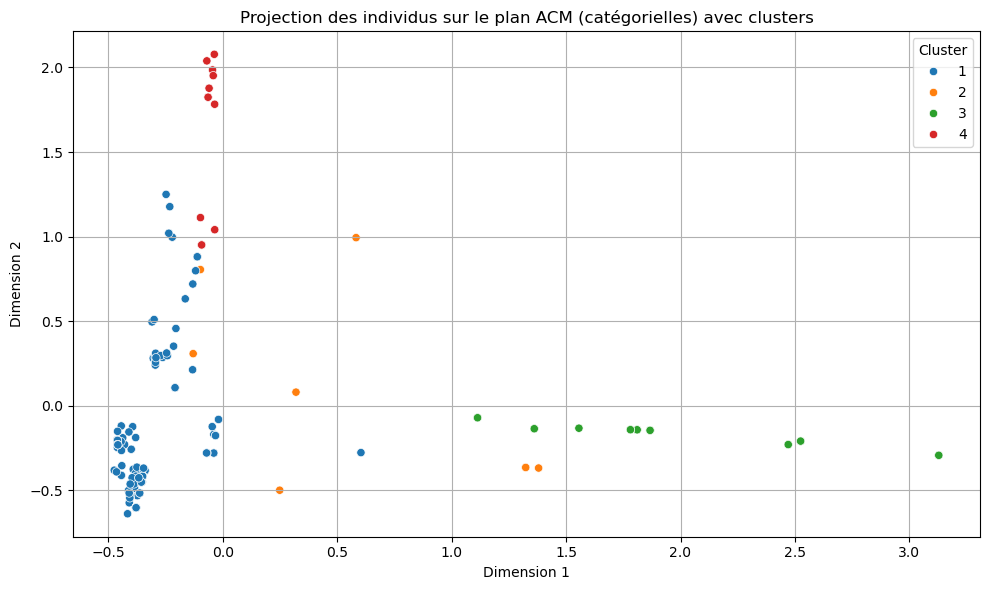

In [22]:
import prince

# Sélection des colonnes catégorielles feat_G à feat_V
cat_cols = [col for col in df.columns if col.startswith('feat_') and df[col].dtype == 'object']

# Copie du DataFrame avec les colonnes catégorielles + cluster
df_cat = df[cat_cols + ['cluster']].copy()

# Remplacer les NaN par une chaîne 'NA' pour que l'ACM les traite comme modalité
df_cat.fillna('NA', inplace=True)

# Lancer l'ACM
acm = prince.MCA(n_components=2, random_state=42)
acm = acm.fit(df_cat[cat_cols])

# Transformation
df_acm = acm.transform(df_cat[cat_cols])
df_acm['cluster'] = df_cat['cluster'].values

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_acm, x=0, y=1, hue='cluster', palette='tab10')
plt.title("Projection des individus sur le plan ACM (catégorielles) avec clusters")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

### Analyse en Composantes Multiples (ACM) et Projection des Clusters

Une ACM a été réalisée sur l’ensemble des variables catégorielles (`feat_G` à `feat_V`) afin de réduire la dimensionnalité et visualiser les relations entre individus et modalités.

Les individus ont ensuite été projetés sur le plan factoriel (dimensions 1 et 2), et colorés selon leur appartenance aux clusters obtenus par la Classification Ascendante Hiérarchique (CAH) réalisée précédemment à partir de la distance de Gower.

Cette visualisation permet de :
- mieux interpréter la structure des clusters dans l’espace des modalités,
- vérifier la cohérence des groupes (par exemple, leur séparation visuelle),
- repérer d’éventuelles proximités ou recouvrements entre classes.

L’ACM **n’a pas été utilisée comme base pour recalculer la CAH**, car la distance de Gower est plus adaptée à la structure mixte (numérique + catégorielle) des données initiales.


## 5. Interprétation et conclusions

### 5.1. Description et comparaison des groupes obtenus
Grâce à la Classification Ascendante Hiérarchique (CAH), nous avons identifié k = 4 groupes de conceptions.
Ces groupes se distinguent par des combinaisons spécifiques de caractéristiques catégorielles (par exemple feat_G, feat_H, etc.) que nous avons visualisées via les modalités dominantes de chaque cluster.

Par exemple, le cluster 1 regroupe des conceptions où feat_M est souvent "legends" et feat_P est "rage"

Le cluster 3 est davantage lié à feat_G = competition, feat_I = mfg et feat_R = last

Ces profils suggèrent que chaque groupe correspond à un type de configuration bien distinct, basé sur des combinaisons spécifiques de sous-composants ou d’options techniques.

### 5.2. Analysez les relations avec γ₁ et γ₂
Nous avons étudié la performance de chaque groupe en calculant la moyenne des indicateurs γ₁ et γ₂ pour chaque cluster :

Le cluster 3 présente des valeurs moyennes élevées pour γ₂ (ex. >1000), ce qui pourrait indiquer une meilleure performance sur cet axe

Le cluster 4 montre des scores relativement faibles en γ₁ et γ₂

Ces écarts suggèrent que certaines combinaisons de caractéristiques sont corrélées à de meilleures performances expérimentales.

### 5.3. Usage potentiel pour le métier

Cette segmentation permet plusieurs applications concrètes pour l’ingénierie :
- recommandation de configurations : pour une nouvelle conception, on peut identifier son groupe et prédire sa performance attendue en se basant sur le groupe correspondant
- filtrage de conceptions sous-performantes : si un groupe présente systématiquement de faibles valeurs en γ₁ et γ₂, il pourrait être écarté des futures itérations
- exploration ciblée : les clusters performants peuvent guider les ingénieurs vers des axes d’optimisation concrets (ex : conserver certaines caractéristiques dominantes)

En résumé, ce travail facilite une compréhension globale du paysage de conceptions, tout en apportant un levier décisionnel utile pour les futures conceptions de la pièce moteur.


<p style="text-align: center;">
    <img src="logo-uvbf.png" alt="Photo" width="300">
</p>